# 深度卷积神经网络（AlexNet）
:label:`sec_alexnet`

在LeNet提出后，卷积神经网络在计算机视觉和机器学习领域中很有名气。但卷积神经网络并没有主导这些领域。这是因为虽然LeNet在小数据集上取得了很好的效果，但是在更大、更真实的数据集上训练卷积神经网络的性能和可行性还有待研究。事实上，在上世纪90年代初到2012年之间的大部分时间里，神经网络往往被其他机器学习方法超越，如支持向量机（support vector machines）。

在计算机视觉中，直接将神经网络与其他机器学习方法进行比较也许不公平。这是因为，卷积神经网络的输入是由原始像素值或是经过简单预处理（例如居中、缩放）的像素值组成的。但在使用传统机器学习方法时，从业者永远不会将原始像素作为输入。在传统机器学习方法中，计算机视觉流水线是由经过人的手工精心设计的特征流水线组成的。对于这些传统方法，大部分的进展都来自于对特征有了更聪明的想法，并且学习到的算法往往归于事后的解释。

虽然上世纪90年代就有了一些神经网络加速卡，但仅靠它们还不足以开发出有大量参数的深层多通道多层卷积神经网络。此外，当时的数据集仍然相对较小。除了这些障碍，训练神经网络的一些关键技巧仍然缺失，包括启发式参数初始化、随机梯度下降的变体、非挤压激活函数和有效的正则化技术。

因此，与训练*端到端*（从像素到分类结果）系统不同，经典机器学习的流水线看起来更像下面这样：

1. 获取一个有趣的数据集。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万像素）。
2. 根据光学、几何学、其他知识以及偶然的发现，手工对特征数据集进行预处理。
3. 通过标准的特征提取算法，如SIFT（尺度不变特征变换） :cite:`Lowe.2004`和SURF（加速鲁棒特征） :cite:`Bay.Tuytelaars.Van-Gool.2006`或其他手动调整的流水线来输入数据。
4. 将提取的特征送入最喜欢的分类器中（例如线性模型或其它核方法），以训练分类器。

当人们和机器学习研究人员交谈时，会发现机器学习研究人员相信机器学习既重要又美丽：优雅的理论去证明各种模型的性质。机器学习是一个正在蓬勃发展、严谨且非常有用的领域。然而，当人们和计算机视觉研究人员交谈，会听到一个完全不同的故事。计算机视觉研究人员会告诉一个诡异事实————推动领域进步的是数据特征，而不是学习算法。计算机视觉研究人员相信，从对最终模型精度的影响来说，更大或更干净的数据集、或是稍微改进的特征提取，比任何学习算法带来的进步要大得多。

## 学习表征

另一种预测这个领域发展的方法————观察图像特征的提取方法。在2012年前，图像特征都是机械地计算出来的。事实上，设计一套新的特征函数、改进结果，并撰写论文是盛极一时的潮流。SIFT :cite:`Lowe.2004`、SURF :cite:`Bay.Tuytelaars.Van-Gool.2006`、HOG（定向梯度直方图） :cite:`Dalal.Triggs.2005`、[bags of visual words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision)和类似的特征提取方法占据了主导地位。

另一组研究人员，包括Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng、Shun ichi Amari和Juergen Schmidhuber，想法则与众不同：他们认为特征本身应该被学习。此外，他们还认为，在合理地复杂性前提下，特征应该由多个共同学习的神经网络层组成，每个层都有可学习的参数。在机器视觉中，最底层可能检测边缘、颜色和纹理。事实上，Alex Krizhevsky、Ilya Sutskever和Geoff Hinton提出了一种新的卷积神经网络变体*AlexNet*。在2012年ImageNet挑战赛中取得了轰动一时的成绩。AlexNet以Alex Krizhevsky的名字命名，他是论文 :cite:`Krizhevsky.Sutskever.Hinton.2012`的第一作者。

有趣的是，在网络的最底层，模型学习到了一些类似于传统滤波器的特征抽取器。 :numref:`fig_filters`是从AlexNet论文 :cite:`Krizhevsky.Sutskever.Hinton.2012`复制的，描述了底层图像特征。

![AlexNet第一层学习到的特征抽取器。](../img/filters.png)
:width:`400px`
:label:`fig_filters`

AlexNet的更高层建立在这些底层表示的基础上，以表示更大的特征，如眼睛、鼻子、草叶等等。而更高的层可以检测整个物体，如人、飞机、狗或飞盘。最终的隐藏神经元可以学习图像的综合表示，从而使属于不同类别的数据易于区分。尽管一直有一群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然而很长一段时间里这些尝试都未有突破。深度卷积神经网络的突破出现在2012年。突破可归因于两个关键因素。

### 缺少的成分：数据

包含许多特征的深度模型需要大量的有标签数据，才能显著优于基于凸优化的传统方法（如线性方法和核方法）。
然而，限于早期计算机有限的存储和90年代有限的研究预算，大部分研究只基于小的公开数据集。例如，不少研究论文基于加州大学欧文分校（UCI）提供的若干个公开数据集，其中许多数据集只有几百至几千张在非自然环境下以低分辨率拍摄的图像。这一状况在2010年前后兴起的大数据浪潮中得到改善。2009年，ImageNet数据集发布，并发起ImageNet挑战赛：要求研究人员从100万个样本中训练模型，以区分1000个不同类别的对象。ImageNet数据集由斯坦福教授李飞飞小组的研究人员开发，利用谷歌图像搜索（Google Image Search）对每一类图像进行预筛选，并利用亚马逊众包（Amazon Mechanical Turk）来标注每张图片的相关类别。这种规模是前所未有的。这项被称为ImageNet的挑战赛推动了计算机视觉和机器学习研究的发展，挑战研究人员确定哪些模型能够在更大的数据规模下表现最好。

### 缺少的成分：硬件

深度学习对计算资源要求很高，训练可能需要数百个迭代轮数，每次迭代都需要通过代价高昂的许多线性代数层传递数据。这也是为什么在20世纪90年代至21世纪初，优化凸目标的简单算法是研究人员的首选。然而，用GPU训练神经网络改变了这一格局。*图形处理器*（Graphics Processing Unit，GPU）早年用来加速图形处理，使电脑游戏玩家受益。GPU可优化高吞吐量的$4 \times 4$矩阵和向量乘法，从而服务于基本的图形任务。幸运的是，这些数学运算与卷积层的计算惊人地相似。由此，英伟达（NVIDIA）和ATI已经开始为通用计算操作优化gpu，甚至把它们作为*通用GPU*（general-purpose GPUs，GPGPU）来销售。

那么GPU比CPU强在哪里呢？

首先，我们深度理解一下中央处理器（Central Processing Unit，CPU）的*核心*。
CPU的每个核心都拥有高时钟频率的运行能力，和高达数MB的三级缓存（L3Cache）。
它们非常适合执行各种指令，具有分支预测器、深层流水线和其他使CPU能够运行各种程序的功能。
然而，这种明显的优势也是它的致命弱点：通用核心的制造成本非常高。
它们需要大量的芯片面积、复杂的支持结构（内存接口、内核之间的缓存逻辑、高速互连等等），而且它们在任何单个任务上的性能都相对较差。
现代笔记本电脑最多有4核，即使是高端服务器也很少超过64核，因为它们的性价比不高。

相比于CPU，GPU由$100 \sim 1000$个小的处理单元组成（NVIDIA、ATI、ARM和其他芯片供应商之间的细节稍有不同），通常被分成更大的组（NVIDIA称之为warps）。
虽然每个GPU核心都相对较弱，有时甚至以低于1GHz的时钟频率运行，但庞大的核心数量使GPU比CPU快几个数量级。
例如，NVIDIA最近一代的Ampere GPU架构为每个芯片提供了高达312 TFlops的浮点性能，而CPU的浮点性能到目前为止还没有超过1 TFlops。
之所以有如此大的差距，原因其实很简单：首先，功耗往往会随时钟频率呈二次方增长。
对于一个CPU核心，假设它的运行速度比GPU快4倍，但可以使用16个GPU核代替，那么GPU的综合性能就是CPU的$16 \times 1/4 = 4$倍。
其次，GPU内核要简单得多，这使得它们更节能。
此外，深度学习中的许多操作需要相对较高的内存带宽，而GPU拥有10倍于CPU的带宽。

回到2012年的重大突破，当Alex Krizhevsky和Ilya Sutskever实现了可以在GPU硬件上运行的深度卷积神经网络时，一个重大突破出现了。他们意识到卷积神经网络中的计算瓶颈：卷积和矩阵乘法，都是可以在硬件上并行化的操作。
于是，他们使用两个显存为3GB的NVIDIA GTX580 GPU实现了快速卷积运算。他们的创新[cuda-convnet](https://code.google.com/archive/p/cuda-convnet/)几年来它一直是行业标准，并推动了深度学习热潮。

## AlexNet

2012年，AlexNet横空出世。它首次证明了学习到的特征可以超越手工设计的特征。它一举打破了计算机视觉研究的现状。
AlexNet使用了8层卷积神经网络，并以很大的优势赢得了2012年ImageNet图像识别挑战赛。

AlexNet和LeNet的架构非常相似，如 :numref:`fig_alexnet`所示。
注意，本书在这里提供的是一个稍微精简版本的AlexNet，去除了当年需要两个小型GPU同时运算的设计特点。

![从LeNet（左）到AlexNet（右）](../img/alexnet.svg)
:label:`fig_alexnet`

AlexNet和LeNet的设计理念非常相似，但也存在显著差异。

1. AlexNet比相对较小的LeNet5要深得多。AlexNet由八层组成：五个卷积层、两个全连接隐藏层和一个全连接输出层。
2. AlexNet使用ReLU而不是sigmoid作为其激活函数。

下面的内容将深入研究AlexNet的细节。

### 模型设计

在AlexNet的第一层，卷积窗口的形状是$11\times11$。
由于ImageNet中大多数图像的宽和高比MNIST图像的多10倍以上，因此，需要一个更大的卷积窗口来捕获目标。
第二层中的卷积窗口形状被缩减为$5\times5$，然后是$3\times3$。
此外，在第一层、第二层和第五层卷积层之后，加入窗口形状为$3\times3$、步幅为2的最大汇聚层。
而且，AlexNet的卷积通道数目是LeNet的10倍。

在最后一个卷积层后有两个全连接层，分别有4096个输出。
这两个巨大的全连接层拥有将近1GB的模型参数。
由于早期GPU显存有限，原版的AlexNet采用了双数据流设计，使得每个GPU只负责存储和计算模型的一半参数。
幸运的是，现在GPU显存相对充裕，所以现在很少需要跨GPU分解模型（因此，本书的AlexNet模型在这方面与原始论文稍有不同）。

### 激活函数

此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。
一方面，ReLU激活函数的计算更简单，它不需要如sigmoid激活函数那般复杂的求幂运算。
另一方面，当使用不同的参数初始化方法时，ReLU激活函数使训练模型更加容易。
当sigmoid激活函数的输出非常接近于0或1时，这些区域的梯度几乎为0，因此反向传播无法继续更新一些模型参数。
相反，ReLU激活函数在正区间的梯度总是1。
因此，如果模型参数没有正确初始化，sigmoid函数可能在正区间内得到几乎为0的梯度，从而使模型无法得到有效的训练。

### 容量控制和预处理

AlexNet通过暂退法（ :numref:`sec_dropout`）控制全连接层的模型复杂度，而LeNet只使用了权重衰减。
为了进一步扩充数据，AlexNet在训练时增加了大量的图像增强数据，如翻转、裁切和变色。
这使得模型更健壮，更大的样本量有效地减少了过拟合。
在 :numref:`sec_image_augmentation`中更详细地讨论数据扩增。


In [15]:
import torch
from torch import nn
from d2l import torch as d2l
import time
import numpy as np
import subprocess
import time
import pandas as pd
from codecarbon import EmissionsTracker
import psutil

net = nn.Sequential(
    # 这里使用一个11*11的更大窗口来捕捉对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10))

[**我们构造一个**]高度和宽度都为224的(**单通道数据，来观察每一层输出的形状**)。
它与 :numref:`fig_alexnet`中的AlexNet架构相匹配。


In [16]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 读取数据集

尽管原文中AlexNet是在ImageNet上进行训练的，但本书在这里使用的是Fashion-MNIST数据集。因为即使在现代GPU上，训练ImageNet模型，同时使其收敛可能需要数小时或数天的时间。
将AlexNet直接应用于Fashion-MNIST的一个问题是，[**Fashion-MNIST图像的分辨率**]（$28 \times 28$像素）(**低于ImageNet图像。**)
为了解决这个问题，(**我们将它们增加到$224 \times 224$**)（通常来讲这不是一个明智的做法，但在这里这样做是为了有效使用AlexNet架构）。
这里需要使用`d2l.load_data_fashion_mnist`函数中的`resize`参数执行此调整。


In [17]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
# print the shape of the train_iter
list_of_i = []
for i, (X, y) in enumerate(train_iter):
    list_of_i.append(i)

print('the shape of the train_iter is:', np.array(list_of_i).shape)
# print(list_of_i)
# print the first 10 batch of the train_iter
for i, (X, y) in enumerate(train_iter):
    if i < 10:
        print('the shape of the', i, 'batch of the train_iter is:', X.shape)
    else:
        break

the shape of the train_iter is: (469,)
the shape of the 0 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 1 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 2 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 3 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 4 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 5 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 6 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 7 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 8 batch of the train_iter is: torch.Size([128, 1, 224, 224])
the shape of the 9 batch of the train_iter is: torch.Size([128, 1, 224, 224])


In [28]:
with open('gpu_power_idle.csv', 'w') as file:
            # Start the nvidia-smi command
            nvidia_smi_process = subprocess.Popen(
                ["nvidia-smi", "--query-gpu=power.draw", "--format=csv", "--loop-ms=1000"],
                stdout=file,  # Redirect the output directly to the file
                stderr=subprocess.PIPE,
                text=True
            )
time.sleep(20)
# stop the nvidia-smi command
nvidia_smi_process.terminate()
# calculate the energy consumption of each epoch
gpu_idle_info = pd.read_csv('gpu_power_idle.csv')
for l in range(len(gpu_idle_info)):
    gpu_idle_info.iloc[l,0] = gpu_idle_info.iloc[l,0].replace(' W','')
gpu_idle = gpu_idle_info.astype(float)
print(gpu_idle)
gpu_idle_avg = np.average(gpu_idle)
print('the average gpu power consumption of idle is:', gpu_idle_avg)

    power.draw [W]
0            25.69
1            25.67
2            25.65
3            25.49
4            25.54
5            25.49
6            25.47
7            25.44
8            25.50
9            25.53
10           25.50
11           25.48
12           25.47
13           25.42
14           25.41
15           25.50
16           25.44
17           25.47
18           25.41
19           25.39
the average gpu power consumption of idle is: 25.497999999999998


In [19]:
# with open('cpu_power_idel.csv', 'w') as file:
#     # Start the nvidia-smi command
#     cpu_process = subprocess.Popen(
#         ["sudo", "turbostat", "-Summary", "--quiet",  "--show", "Busy%,Avg_MHz,PkgWatt","--format=csv", "--interval", "1"],
#         stdout=file,  # Redirect the output directly to the file
#         stderr=subprocess.PIPE,
#         text=True
#     )
# time.sleep(20)

## [**训练AlexNet**]

现在AlexNet可以开始被训练了。与 :numref:`sec_lenet`中的LeNet相比，这里的主要变化是使用更小的学习速率训练，这是因为网络更深更广、图像分辨率更高，训练卷积神经网络就更昂贵。


In [20]:
'''
对train_ch6()函数进行修改，使得能够在每一层的前向传播的时候，记录下时间, 
能耗部分不好进行具体统计，因为每个层的能耗有区别，并且时间过短，所以采用的方式为计算总能耗和总时长，最后通过平均值来计算估算的能耗
'''
def train_ch6self(net, train_iter, test_iter, num_epochs, lr, device):
    def init_weights(m): # 初始化权重
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
    net.apply(init_weights)
    # set a list of layer name
    list_layer_name = ['Conv2d','ReLU','MaxPool2d','Linear','Dropout','Flatten'] # 该模型中包括的所有的层的名字
    # create a numpy array to store the time and energy consumption, the shape is (num_epochs, len(list_layer_name), 2)
    # for each epoch, the shape is (6,2), contains the total time and the energy consumption of each layer
    timeenergy_data_forward = np.zeros((num_epochs, len(list_layer_name), 2)) 
    # for each epoch, the shape is (6,2), contains the total time of each part in a round, which is to_device, forward, loss, backward, optimizer，test_round
    # and the 2 means time and energy consumption, respectively
    timeenergy_data_round = np.zeros((num_epochs, 6, 2)) 
    # create another numpy array to store the data of each epoch, 1 column is training loss, 2 column is training accuracy, 3 column is test accuracy
    acc_data = []
    # create a numpy array to store the train loss and train accuracy
    train_l = []
    train_acc = []
    # create a numpy array to store the epoch and running time
    time_data_epoch = np.zeros((num_epochs, 2))
    # create a numpy array to store the energy consumption of each epoch
    energy_data_epoch = np.zeros((num_epochs, 1), dtype=object)
    GPU_info_epoch = []
    # print the training device
    print('training on', device)
    net.to(device) # 将模型放到对应的设备上
    # 初始化optimizer和loss
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()
    # 初始化计时器
    timer, num_batches = d2l.Timer(), len(train_iter)   
    # 开始训练
    for epoch in range(num_epochs):
        print('epoch %d' % (epoch + 1))
        # each epoch, set a timer to record the time
        timer.start()
        ##############################################################################################################
        # start the nvidia-smi command
        with open('gpu_power_usage.csv', 'w') as file:
            # Start the nvidia-smi command
            nvidia_smi_process = subprocess.Popen(
                ["nvidia-smi", "--query-gpu=power.draw", "--format=csv", "--loop-ms=1000"],
                stdout=file,  # Redirect the output directly to the file
                stderr=subprocess.PIPE,
                text=True
            )
        ##############################################################################################################
        net.train() # 设置为训练模式
        # 初始化每个epoch的统计时间的变量
        time_to_device_cost, time_forward, time_cost_loss = 0,0,0
        time_cost_backward, time_cost_optimizer, time_test_acc_cost = 0,0,0
        train_l_epoch = []
        train_acc_epoch = []
        metric = d2l.Accumulator(3)
        for i, (X, y) in enumerate(train_iter):
            print('round %d' % (i))
            time_round_start = time.time() # 计算每一轮的时间s
            optimizer.zero_grad() # 将optimizer的梯度清零s
            time_forward_epoch = np.zeros((len(list_layer_name), 1))
        ##################################################################################
            # 计算将数据放到对应的设备上的时间
            time_to_device_cost_i = 0
            time_to_device = time.time()
            X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)
            time_to_device_end = time.time()
            time_to_device_cost_i = time_to_device_end - time_to_device
            print('time to device %f sec' % (time_to_device_cost_i))
            time_to_device_cost += time_to_device_cost_i
        ##################################################################################
            # 将原本的模型进行修改，使得能够逐层进行运行，并且在这个过程中，记录下时间和能量
            y_hat = X
            for layer in net:
                time_cost_layer = 0
                layer_name = layer.__class__.__name__ # 获取层的名字
                # find out the layer name is in where of the list
                layer_index = list_layer_name.index(layer_name)
                # calculate the time
                time_start_layer = time.time()
                y_hat = layer(y_hat)
                time_end_layer = time.time()
                time_cost_layer = time_end_layer - time_start_layer
                time_forward_epoch[layer_index,0] += time_cost_layer
                timeenergy_data_forward[epoch,layer_index,0] += time_cost_layer
                if torch.isinf(y_hat).any() or torch.isnan(y_hat).any():
                    print("Inf or NaN detected in y_hat")
            # 计算前向的时间
            time_forward = np.sum(timeenergy_data_forward[epoch,:,0])
            print('time forward %f sec' % (np.sum(time_forward_epoch)))
        ##################################################################################
            # 计算loss
            time_cost_loss_i = 0 # 初始化loss的时间
            time_start_loss = time.time()
            loss = loss_fn(y_hat, y)
            # print(loss)
            time_end_loss = time.time()
            time_cost_loss_i = time_end_loss - time_start_loss
            print('loss time %f sec' % (time_cost_loss_i))
            time_cost_loss += time_cost_loss_i
        ##################################################################################
            # 计算backward
            time_cost_backward_i = 0 # 初始化backward的时间
            time_start_backward = time.time()
            loss.backward()
            time_end_backward = time.time()
            time_cost_backward_i = time_end_backward - time_start_backward
            print('backward time %f sec' % (time_cost_backward_i))
            time_cost_backward += time_cost_backward_i
        ##################################################################################
            # 计算optimizer
            time_cost_optimizer_i = 0 # 初始化optimizer的时间
            time_start_optimizer = time.time()
            optimizer.step()
            time_end_optimizer = time.time()
            time_cost_optimizer_i = time_end_optimizer - time_start_optimizer
            print('optimizer time %f sec' % (time_cost_optimizer_i))
            time_cost_optimizer += time_cost_optimizer_i
        ##################################################################################
            time_round_end = time.time()
            time_round_cost = time_round_end - time_round_start
            print(f'training time in round {i} cost {time_round_cost} sec')
        ##################################################################################
            with torch.no_grad():
                metric.add(loss * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            train_l_i = metric[0] / metric[2]
            train_acc_i = metric[1] / metric[2]
            train_l_epoch.append(train_l_i)
            train_acc_epoch.append(train_acc_i)
            print('loss %f, train acc %f' % (train_l_i, train_acc_i))
        train_l.append(train_l_epoch)
        train_acc.append(train_acc_epoch)
        ##################################################################################
        # 进行模型的test部分运行
        time_test_acc_cost_epoch = 0
        time_test_acc_start = time.time()
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter, device)
        time_test_acc_end = time.time()
        time_test_acc_cost_epoch = time_test_acc_end - time_test_acc_start
        time_test_acc_cost += time_test_acc_cost_epoch
        print('test acc is %f' % (test_acc))
        acc_data.append(test_acc)
        ##################################################################################
        # 将每一轮的每个部分的时间加入到time_data_round中
        timeenergy_data_round[epoch,0,0] = time_to_device_cost
        timeenergy_data_round[epoch,1,0] = time_forward
        timeenergy_data_round[epoch,2,0] = time_cost_loss
        timeenergy_data_round[epoch,3,0] = time_cost_backward
        timeenergy_data_round[epoch,4,0] = time_cost_optimizer
        timeenergy_data_round[epoch,5,0] = time_test_acc_cost
        ##################################################################################
        # stop the nvidia-smi command
        nvidia_smi_process.terminate()
        timer.stop() # 停止计时 
        time_data_epoch[epoch,0] = epoch + 1
        time_data_epoch[epoch,1] = timer.sum()
        ##############################################################################################################
        # calculate the energy consumption of each epoch
        energy_datal = pd.read_csv('gpu_power_usage.csv')
        for l in range(len(energy_datal)):
            energy_datal.iloc[l,0] = energy_datal.iloc[l,0].replace(' W','')
        energy_datal = energy_datal.astype(float)
        GPU_info_epoch.append(energy_datal)
        energy_datal_sum = energy_datal.sum()
        energy_data_epoch[epoch,0] = energy_datal_sum
        # print('epoch %d, time %f sec' % (epoch, timer.sum()))
    return timeenergy_data_forward, timeenergy_data_round, acc_data, train_l, train_acc, time_data_epoch, energy_data_epoch, GPU_info_epoch

In [21]:
# use the explicit offline to collect the energy .csv file
# import the tracker using explicit mode
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 11:49:28] [setup] RAM Tracking...
[codecarbon INFO @ 11:49:28] [setup] GPU Tracking...
[codecarbon INFO @ 11:49:28] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 11:49:28] [setup] CPU Tracking...
[codecarbon WARNING @ 11:49:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 11:49:29] CPU Model on constant consumption mode: AMD Ryzen 7 5800H with Radeon Graphics
[codecarbon INFO @ 11:49:29] >>> Tracker's metadata:
[codecarbon INFO @ 11:49:29]   Platform system: Linux-6.2.0-37-generic-x86_64-with-glibc2.35
[codecarbon INFO @ 11:49:29]   Python version: 3.11.5
[codecarbon INFO @ 11:49:29]   CodeCarbon version: 2.3.1
[codecarbon INFO @ 11:49:29]   Available RAM : 31.190 GB
[codecarbon INFO @ 11:49:29]   CPU count: 16
[codecarbon INFO @ 11:49:29]   CPU model: AMD Ryzen 7 5800H with Radeon Graphics
[codecarbon INFO @ 11:49:29]   GPU count: 1
[codecarbon INFO @ 11:49:29]   GPU model: 1 x NVIDIA GeForce RTX 3060 Laptop GPU


# use the explicit offline to collect the energy .csv file
# import the tracker using explicit mode
tracker = EmissionsTracker()
tracker.start()

In [22]:
lr, num_epochs = 0.01, 30
device = d2l.try_gpu()
timeenergy_data_forward, timeenergy_data_round, acc_data, train_l, train_acc, time_data_epoch, energy_data_epoch, GPU_info_epoch = train_ch6self(net, train_iter, test_iter, num_epochs, lr, device)

training on cuda:0
epoch 1
round 0
time to device 0.004858 sec
time forward 0.002582 sec
loss time 0.000122 sec
backward time 0.002484 sec
optimizer time 0.000479 sec
training time in round 0 cost 0.051595211029052734 sec
loss 2.305913, train acc 0.117188
round 1
time to device 0.004037 sec
time forward 0.001227 sec
loss time 0.000090 sec
backward time 0.001253 sec
optimizer time 0.000217 sec
training time in round 1 cost 0.04712080955505371 sec
loss 2.301978, train acc 0.132812
round 2
time to device 0.004002 sec
time forward 0.001184 sec
loss time 0.000085 sec
backward time 0.001311 sec
optimizer time 0.000216 sec
training time in round 2 cost 0.04391884803771973 sec
loss 2.300607, train acc 0.122396
round 3
time to device 0.003960 sec
time forward 0.001103 sec
loss time 0.000091 sec
backward time 0.001153 sec
optimizer time 0.000210 sec
training time in round 3 cost 0.04444694519042969 sec
loss 2.300505, train acc 0.121094
round 4
time to device 0.004015 sec
time forward 0.001114 se

[codecarbon INFO @ 11:49:48] Energy consumed for RAM : 0.000049 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:49:48] Energy consumed for all GPUs : 0.000594 kWh. Total GPU Power : 142.51739544613417 W
[codecarbon INFO @ 11:49:48] Energy consumed for all CPUs : 0.000113 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:49:48] 0.000755 kWh of electricity used since the beginning.


loss 2.188437, train acc 0.188706
round 149
time to device 0.004059 sec
time forward 0.001157 sec
loss time 0.000086 sec
backward time 0.001260 sec
optimizer time 0.000198 sec
training time in round 149 cost 0.042916059494018555 sec
loss 2.183871, train acc 0.190677
round 150
time to device 0.004012 sec
time forward 0.001055 sec
loss time 0.000087 sec
backward time 0.001239 sec
optimizer time 0.000202 sec
training time in round 150 cost 0.043170928955078125 sec
loss 2.180054, train acc 0.191794
round 151
time to device 0.004176 sec
time forward 0.001097 sec
loss time 0.000085 sec
backward time 0.001368 sec
optimizer time 0.000219 sec
training time in round 151 cost 0.043013572692871094 sec
loss 2.175221, train acc 0.193514
round 152
time to device 0.004023 sec
time forward 0.001131 sec
loss time 0.000086 sec
backward time 0.001185 sec
optimizer time 0.000186 sec
training time in round 152 cost 0.04262566566467285 sec
loss 2.170651, train acc 0.195006
round 153
time to device 0.004029 s

[codecarbon INFO @ 11:50:03] Energy consumed for RAM : 0.000097 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:50:03] Energy consumed for all GPUs : 0.001178 kWh. Total GPU Power : 140.11744242652708 W
[codecarbon INFO @ 11:50:03] Energy consumed for all CPUs : 0.000225 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:50:03] 0.001500 kWh of electricity used since the beginning.


loss 1.650212, train acc 0.382967
round 303
time to device 0.004002 sec
time forward 0.001085 sec
loss time 0.000085 sec
backward time 0.001281 sec
optimizer time 0.000206 sec
training time in round 303 cost 0.04301714897155762 sec
loss 1.647281, train acc 0.384200
round 304
time to device 0.004078 sec
time forward 0.001098 sec
loss time 0.000087 sec
backward time 0.001227 sec
optimizer time 0.000191 sec
training time in round 304 cost 0.04207324981689453 sec
loss 1.644845, train acc 0.385195
round 305
time to device 0.004099 sec
time forward 0.001178 sec
loss time 0.000087 sec
backward time 0.001213 sec
optimizer time 0.000189 sec
training time in round 305 cost 0.04305887222290039 sec
loss 1.642156, train acc 0.386285
round 306
time to device 0.004019 sec
time forward 0.001209 sec
loss time 0.000085 sec
backward time 0.001216 sec
optimizer time 0.000188 sec
training time in round 306 cost 0.04301786422729492 sec
loss 1.639672, train acc 0.387342
round 307
time to device 0.004002 sec


[codecarbon INFO @ 11:50:18] Energy consumed for RAM : 0.000146 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:50:18] Energy consumed for all GPUs : 0.001779 kWh. Total GPU Power : 144.36930704396994 W
[codecarbon INFO @ 11:50:18] Energy consumed for all CPUs : 0.000338 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:50:18] 0.002263 kWh of electricity used since the beginning.


time forward 0.001149 sec
loss time 0.000088 sec
backward time 0.001494 sec
optimizer time 0.000189 sec
training time in round 458 cost 0.04401040077209473 sec
loss 1.367384, train acc 0.488051
round 459
time to device 0.004130 sec
time forward 0.001156 sec
loss time 0.000084 sec
backward time 0.001245 sec
optimizer time 0.000202 sec
training time in round 459 cost 0.04407000541687012 sec
loss 1.366101, train acc 0.488621
round 460
time to device 0.004038 sec
time forward 0.001103 sec
loss time 0.000085 sec
backward time 0.001146 sec
optimizer time 0.000193 sec
training time in round 460 cost 0.042908668518066406 sec
loss 1.364488, train acc 0.489171
round 461
time to device 0.004010 sec
time forward 0.000943 sec
loss time 0.000077 sec
backward time 0.001150 sec
optimizer time 0.000212 sec
training time in round 461 cost 0.04262900352478027 sec
loss 1.362855, train acc 0.489786
round 462
time to device 0.003982 sec
time forward 0.000958 sec
loss time 0.000082 sec
backward time 0.001349

[codecarbon INFO @ 11:50:33] Energy consumed for RAM : 0.000195 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:50:33] Energy consumed for all GPUs : 0.002336 kWh. Total GPU Power : 133.5299927836645 W
[codecarbon INFO @ 11:50:33] Energy consumed for all CPUs : 0.000450 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:50:33] 0.002981 kWh of electricity used since the beginning.


time forward 0.001166 sec
loss time 0.000093 sec
backward time 0.001401 sec
optimizer time 0.000204 sec
training time in round 111 cost 0.04367685317993164 sec
loss 0.736289, train acc 0.727400
round 112
time to device 0.003973 sec
time forward 0.001183 sec
loss time 0.000088 sec
backward time 0.001232 sec
optimizer time 0.000198 sec
training time in round 112 cost 0.04359078407287598 sec
loss 0.735597, train acc 0.727738
round 113
time to device 0.004044 sec
time forward 0.001128 sec
loss time 0.000086 sec
backward time 0.002021 sec
optimizer time 0.000420 sec
training time in round 113 cost 0.04459857940673828 sec
loss 0.734252, train acc 0.728276
round 114
time to device 0.003986 sec
time forward 0.001192 sec
loss time 0.000085 sec
backward time 0.001235 sec
optimizer time 0.000191 sec
training time in round 114 cost 0.04395246505737305 sec
loss 0.734179, train acc 0.728261
round 115
time to device 0.003994 sec
time forward 0.001247 sec
loss time 0.000097 sec
backward time 0.001269 

[codecarbon INFO @ 11:50:48] Energy consumed for RAM : 0.000244 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:50:48] Energy consumed for all GPUs : 0.002931 kWh. Total GPU Power : 142.8838926375723 W
[codecarbon INFO @ 11:50:48] Energy consumed for all CPUs : 0.000563 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:50:48] 0.003737 kWh of electricity used since the beginning.


loss 0.683374, train acc 0.743524
round 263
time to device 0.004080 sec
time forward 0.001127 sec
loss time 0.000085 sec
backward time 0.001192 sec
optimizer time 0.000211 sec
training time in round 263 cost 0.043386220932006836 sec
loss 0.683397, train acc 0.743549
round 264
time to device 0.004004 sec
time forward 0.001100 sec
loss time 0.000088 sec
backward time 0.001210 sec
optimizer time 0.000198 sec
training time in round 264 cost 0.04349875450134277 sec
loss 0.683372, train acc 0.743691
round 265
time to device 0.004110 sec
time forward 0.001204 sec
loss time 0.000088 sec
backward time 0.001222 sec
optimizer time 0.000196 sec
training time in round 265 cost 0.04368185997009277 sec
loss 0.683259, train acc 0.743773
round 266
time to device 0.004003 sec
time forward 0.001081 sec
loss time 0.000086 sec
backward time 0.001199 sec
optimizer time 0.000221 sec
training time in round 266 cost 0.043993234634399414 sec
loss 0.682762, train acc 0.743972
round 267
time to device 0.003999 se

[codecarbon INFO @ 11:51:03] Energy consumed for RAM : 0.000292 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:51:03] Energy consumed for all GPUs : 0.003538 kWh. Total GPU Power : 145.7497033836225 W
[codecarbon INFO @ 11:51:03] Energy consumed for all CPUs : 0.000675 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:51:03] 0.004506 kWh of electricity used since the beginning.


time forward 0.001134 sec
loss time 0.000205 sec
backward time 0.001241 sec
optimizer time 0.000284 sec
training time in round 416 cost 0.04345893859863281 sec
loss 0.657522, train acc 0.753335
round 417
time to device 0.004086 sec
time forward 0.001114 sec
loss time 0.000087 sec
backward time 0.001283 sec
optimizer time 0.000462 sec
training time in round 417 cost 0.043627262115478516 sec
loss 0.657455, train acc 0.753289
round 418
time to device 0.004117 sec
time forward 0.001163 sec
loss time 0.000087 sec
backward time 0.001248 sec
optimizer time 0.000199 sec
training time in round 418 cost 0.0436558723449707 sec
loss 0.657564, train acc 0.753151
round 419
time to device 0.004007 sec
time forward 0.001251 sec
loss time 0.000107 sec
backward time 0.001280 sec
optimizer time 0.000422 sec
training time in round 419 cost 0.04457902908325195 sec
loss 0.657338, train acc 0.753199
round 420
time to device 0.003979 sec
time forward 0.001174 sec
loss time 0.000086 sec
backward time 0.002117 

[codecarbon INFO @ 11:51:18] Energy consumed for RAM : 0.000341 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:51:18] Energy consumed for all GPUs : 0.004133 kWh. Total GPU Power : 142.83629273682263 W
[codecarbon INFO @ 11:51:18] Energy consumed for all CPUs : 0.000788 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:51:18] 0.005262 kWh of electricity used since the beginning.


time to device 0.004284 sec
time forward 0.001192 sec
loss time 0.000087 sec
backward time 0.001263 sec
optimizer time 0.000196 sec
training time in round 69 cost 0.04414796829223633 sec
loss 0.584160, train acc 0.783817
round 70
time to device 0.004102 sec
time forward 0.001104 sec
loss time 0.000084 sec
backward time 0.001293 sec
optimizer time 0.000201 sec
training time in round 70 cost 0.04354214668273926 sec
loss 0.583888, train acc 0.783561
round 71
time to device 0.004019 sec
time forward 0.001123 sec
loss time 0.000210 sec
backward time 0.001257 sec
optimizer time 0.000202 sec
training time in round 71 cost 0.04415464401245117 sec
loss 0.584026, train acc 0.782986
round 72
time to device 0.004066 sec
time forward 0.001146 sec
loss time 0.000207 sec
backward time 0.001230 sec
optimizer time 0.000189 sec
training time in round 72 cost 0.044313669204711914 sec
loss 0.583860, train acc 0.782641
round 73
time to device 0.004069 sec
time forward 0.001076 sec
loss time 0.000088 sec
ba

[codecarbon INFO @ 11:51:33] Energy consumed for RAM : 0.000390 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:51:33] Energy consumed for all GPUs : 0.004697 kWh. Total GPU Power : 135.22341477490215 W
[codecarbon INFO @ 11:51:33] Energy consumed for all CPUs : 0.000900 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:51:33] 0.005986 kWh of electricity used since the beginning.


time forward 0.001174 sec
loss time 0.000211 sec
backward time 0.001256 sec
optimizer time 0.000192 sec
training time in round 221 cost 0.043843984603881836 sec
loss 0.554926, train acc 0.791526
round 222
time to device 0.004030 sec
time forward 0.001244 sec
loss time 0.000097 sec
backward time 0.001246 sec
optimizer time 0.000213 sec
training time in round 222 cost 0.04385948181152344 sec
loss 0.554877, train acc 0.791550
round 223
time to device 0.004111 sec
time forward 0.001132 sec
loss time 0.000087 sec
backward time 0.001216 sec
optimizer time 0.000205 sec
training time in round 223 cost 0.044425010681152344 sec
loss 0.554476, train acc 0.791643
round 224
time to device 0.004000 sec
time forward 0.001159 sec
loss time 0.000086 sec
backward time 0.001272 sec
optimizer time 0.000197 sec
training time in round 224 cost 0.04326581954956055 sec
loss 0.554576, train acc 0.791597
round 225
time to device 0.004045 sec
time forward 0.001108 sec
loss time 0.000093 sec
backward time 0.00124

[codecarbon INFO @ 11:51:48] Energy consumed for RAM : 0.000439 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:51:48] Energy consumed for all GPUs : 0.005312 kWh. Total GPU Power : 147.76783737948344 W
[codecarbon INFO @ 11:51:48] Energy consumed for all CPUs : 0.001013 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:51:48] 0.006763 kWh of electricity used since the beginning.


loss 0.541535, train acc 0.797441
round 373
time to device 0.004115 sec
time forward 0.001144 sec
loss time 0.000084 sec
backward time 0.001215 sec
optimizer time 0.000194 sec
training time in round 373 cost 0.04350876808166504 sec
loss 0.541729, train acc 0.797335
round 374
time to device 0.004090 sec
time forward 0.001355 sec
loss time 0.000115 sec
backward time 0.001614 sec
optimizer time 0.000267 sec
training time in round 374 cost 0.046175241470336914 sec
loss 0.541669, train acc 0.797312
round 375
time to device 0.004182 sec
time forward 0.001124 sec
loss time 0.000084 sec
backward time 0.001451 sec
optimizer time 0.000197 sec
training time in round 375 cost 0.04404854774475098 sec
loss 0.541461, train acc 0.797436
round 376
time to device 0.004181 sec
time forward 0.001173 sec
loss time 0.000087 sec
backward time 0.001247 sec
optimizer time 0.000193 sec
training time in round 376 cost 0.043401479721069336 sec
loss 0.541358, train acc 0.797559
round 377
time to device 0.004064 se

[codecarbon INFO @ 11:52:03] Energy consumed for RAM : 0.000487 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:52:03] Energy consumed for all GPUs : 0.005892 kWh. Total GPU Power : 139.27938357635657 W
[codecarbon INFO @ 11:52:03] Energy consumed for all CPUs : 0.001125 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:52:03] 0.007505 kWh of electricity used since the beginning.


time forward 0.001155 sec
loss time 0.000209 sec
backward time 0.001229 sec
optimizer time 0.000281 sec
training time in round 25 cost 0.044855356216430664 sec
loss 0.500979, train acc 0.819411
round 26
time to device 0.003998 sec
time forward 0.001383 sec
loss time 0.000083 sec
backward time 0.001277 sec
optimizer time 0.000214 sec
training time in round 26 cost 0.0451662540435791 sec
loss 0.500219, train acc 0.819444
round 27
time to device 0.004047 sec
time forward 0.001144 sec
loss time 0.000085 sec
backward time 0.001305 sec
optimizer time 0.000203 sec
training time in round 27 cost 0.04411172866821289 sec
loss 0.506229, train acc 0.816127
round 28
time to device 0.004172 sec
time forward 0.001255 sec
loss time 0.000087 sec
backward time 0.001288 sec
optimizer time 0.000261 sec
training time in round 28 cost 0.04494357109069824 sec
loss 0.506021, train acc 0.816810
round 29
time to device 0.004906 sec
time forward 0.001360 sec
loss time 0.000093 sec
backward time 0.001308 sec
opti

[codecarbon INFO @ 11:52:18] Energy consumed for RAM : 0.000536 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:52:18] Energy consumed for all GPUs : 0.006481 kWh. Total GPU Power : 141.24986089710427 W
[codecarbon INFO @ 11:52:18] Energy consumed for all CPUs : 0.001238 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:52:18] 0.008254 kWh of electricity used since the beginning.


time forward 0.001320 sec
loss time 0.000172 sec
backward time 0.001213 sec
optimizer time 0.000192 sec
training time in round 178 cost 0.045194387435913086 sec
loss 0.486691, train acc 0.820793
round 179
time to device 0.004033 sec
time forward 0.001043 sec
loss time 0.000095 sec
backward time 0.001488 sec
optimizer time 0.000409 sec
training time in round 179 cost 0.04405498504638672 sec
loss 0.486736, train acc 0.820833
round 180
time to device 0.004022 sec
time forward 0.001122 sec
loss time 0.000085 sec
backward time 0.001250 sec
optimizer time 0.000199 sec
training time in round 180 cost 0.043898582458496094 sec
loss 0.486903, train acc 0.820917
round 181
time to device 0.003992 sec
time forward 0.001104 sec
loss time 0.000084 sec
backward time 0.001215 sec
optimizer time 0.000194 sec
training time in round 181 cost 0.04413890838623047 sec
loss 0.487272, train acc 0.820742
round 182
time to device 0.004134 sec
time forward 0.001166 sec
loss time 0.000087 sec
backward time 0.00125

[codecarbon INFO @ 11:52:33] Energy consumed for RAM : 0.000585 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:52:33] Energy consumed for all GPUs : 0.007067 kWh. Total GPU Power : 140.8110046339326 W
[codecarbon INFO @ 11:52:33] Energy consumed for all CPUs : 0.001350 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:52:33] 0.009002 kWh of electricity used since the beginning.


time to device 0.004056 sec
time forward 0.001321 sec
loss time 0.000105 sec
backward time 0.001241 sec
optimizer time 0.000349 sec
training time in round 330 cost 0.04433012008666992 sec
loss 0.474048, train acc 0.823853
round 331
time to device 0.004044 sec
time forward 0.001114 sec
loss time 0.000085 sec
backward time 0.001232 sec
optimizer time 0.000213 sec
training time in round 331 cost 0.04385995864868164 sec
loss 0.474461, train acc 0.823560
round 332
time to device 0.004114 sec
time forward 0.001231 sec
loss time 0.000216 sec
backward time 0.001619 sec
optimizer time 0.000195 sec
training time in round 332 cost 0.04508805274963379 sec
loss 0.474401, train acc 0.823574
round 333
time to device 0.004149 sec
time forward 0.001080 sec
loss time 0.000086 sec
backward time 0.001242 sec
optimizer time 0.000196 sec
training time in round 333 cost 0.04341936111450195 sec
loss 0.474789, train acc 0.823423
round 334
time to device 0.004077 sec
time forward 0.001087 sec
loss time 0.000086

[codecarbon INFO @ 11:52:48] Energy consumed for RAM : 0.000633 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:52:48] Energy consumed for all GPUs : 0.007662 kWh. Total GPU Power : 142.65186586603488 W
[codecarbon INFO @ 11:52:48] Energy consumed for all CPUs : 0.001463 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:52:48] 0.009758 kWh of electricity used since the beginning.


test acc is 0.842200
epoch 5
round 0
time to device 0.005395 sec
time forward 0.002798 sec
loss time 0.000282 sec
backward time 0.002738 sec
optimizer time 0.000593 sec
training time in round 0 cost 0.04949665069580078 sec
loss 0.545609, train acc 0.820312
round 1
time to device 0.004073 sec
time forward 0.001112 sec
loss time 0.000092 sec
backward time 0.001381 sec
optimizer time 0.000215 sec
training time in round 1 cost 0.04355907440185547 sec
loss 0.535371, train acc 0.812500
round 2
time to device 0.004084 sec
time forward 0.001160 sec
loss time 0.000093 sec
backward time 0.001346 sec
optimizer time 0.000224 sec
training time in round 2 cost 0.04359865188598633 sec
loss 0.484558, train acc 0.828125
round 3
time to device 0.003997 sec
time forward 0.001142 sec
loss time 0.000087 sec
backward time 0.001248 sec
optimizer time 0.000203 sec
training time in round 3 cost 0.04425048828125 sec
loss 0.445743, train acc 0.847656
round 4
time to device 0.004019 sec
time forward 0.001193 sec


[codecarbon INFO @ 11:53:03] Energy consumed for RAM : 0.000682 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:53:03] Energy consumed for all GPUs : 0.008257 kWh. Total GPU Power : 142.83649517440878 W
[codecarbon INFO @ 11:53:03] Energy consumed for all CPUs : 0.001575 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:53:03] 0.010514 kWh of electricity used since the beginning.


round 134
time to device 0.004032 sec
time forward 0.001163 sec
loss time 0.000110 sec
backward time 0.001519 sec
optimizer time 0.000286 sec
training time in round 134 cost 0.044550418853759766 sec
loss 0.433366, train acc 0.839352
round 135
time to device 0.004034 sec
time forward 0.001122 sec
loss time 0.000087 sec
backward time 0.001220 sec
optimizer time 0.000208 sec
training time in round 135 cost 0.04397010803222656 sec
loss 0.434051, train acc 0.839442
round 136
time to device 0.004172 sec
time forward 0.001232 sec
loss time 0.000088 sec
backward time 0.001232 sec
optimizer time 0.000206 sec
training time in round 136 cost 0.044464826583862305 sec
loss 0.433250, train acc 0.839758
round 137
time to device 0.004018 sec
time forward 0.001126 sec
loss time 0.000087 sec
backward time 0.001215 sec
optimizer time 0.000214 sec
training time in round 137 cost 0.04393720626831055 sec
loss 0.433428, train acc 0.839787
round 138
time to device 0.004035 sec
time forward 0.001192 sec
loss t

[codecarbon INFO @ 11:53:18] Energy consumed for RAM : 0.000731 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:53:18] Energy consumed for all GPUs : 0.008842 kWh. Total GPU Power : 140.5546979019499 W
[codecarbon INFO @ 11:53:18] Energy consumed for all CPUs : 0.001688 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:53:18] 0.011261 kWh of electricity used since the beginning.


round 285
time to device 0.004094 sec
time forward 0.001174 sec
loss time 0.000085 sec
backward time 0.001240 sec
optimizer time 0.000205 sec
training time in round 285 cost 0.043707847595214844 sec
loss 0.432707, train acc 0.840445
round 286
time to device 0.004027 sec
time forward 0.001123 sec
loss time 0.000086 sec
backward time 0.001164 sec
optimizer time 0.000198 sec
training time in round 286 cost 0.043595314025878906 sec
loss 0.432730, train acc 0.840511
round 287
time to device 0.004084 sec
time forward 0.001172 sec
loss time 0.000237 sec
backward time 0.001253 sec
optimizer time 0.000191 sec
training time in round 287 cost 0.04432559013366699 sec
loss 0.432790, train acc 0.840522
round 288
time to device 0.004629 sec
time forward 0.001384 sec
loss time 0.000114 sec
backward time 0.001427 sec
optimizer time 0.000278 sec
training time in round 288 cost 0.0450444221496582 sec
loss 0.432572, train acc 0.840560
round 289
time to device 0.004015 sec
time forward 0.001072 sec
loss ti

[codecarbon INFO @ 11:53:33] Energy consumed for RAM : 0.000780 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:53:33] Energy consumed for all GPUs : 0.009439 kWh. Total GPU Power : 143.2394862362645 W
[codecarbon INFO @ 11:53:33] Energy consumed for all CPUs : 0.001800 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:53:33] 0.012019 kWh of electricity used since the beginning.


loss 0.427929, train acc 0.842391
round 437
time to device 0.004102 sec
time forward 0.001082 sec
loss time 0.000086 sec
backward time 0.001263 sec
optimizer time 0.000195 sec
training time in round 437 cost 0.04369831085205078 sec
loss 0.427733, train acc 0.842466
round 438
time to device 0.004010 sec
time forward 0.001142 sec
loss time 0.000086 sec
backward time 0.001213 sec
optimizer time 0.000194 sec
training time in round 438 cost 0.04401254653930664 sec
loss 0.427942, train acc 0.842309
round 439
time to device 0.004150 sec
time forward 0.001106 sec
loss time 0.000100 sec
backward time 0.001246 sec
optimizer time 0.000195 sec
training time in round 439 cost 0.04296445846557617 sec
loss 0.427835, train acc 0.842365
round 440
time to device 0.004064 sec
time forward 0.001136 sec
loss time 0.000096 sec
backward time 0.001243 sec
optimizer time 0.000194 sec
training time in round 440 cost 0.04343056678771973 sec
loss 0.428139, train acc 0.842209
round 441
time to device 0.004308 sec


[codecarbon INFO @ 11:53:48] Energy consumed for RAM : 0.000828 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:53:48] Energy consumed for all GPUs : 0.010040 kWh. Total GPU Power : 144.1490272439594 W
[codecarbon INFO @ 11:53:48] Energy consumed for all CPUs : 0.001913 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:53:48] 0.012781 kWh of electricity used since the beginning.


time to device 0.004039 sec
time forward 0.001291 sec
loss time 0.000083 sec
backward time 0.001273 sec
optimizer time 0.000193 sec
training time in round 90 cost 0.046388864517211914 sec
loss 0.399877, train acc 0.853966
round 91
time to device 0.004061 sec
time forward 0.001113 sec
loss time 0.000086 sec
backward time 0.001167 sec
optimizer time 0.000539 sec
training time in round 91 cost 0.04471564292907715 sec
loss 0.399605, train acc 0.854535
round 92
time to device 0.004044 sec
time forward 0.001118 sec
loss time 0.000091 sec
backward time 0.001414 sec
optimizer time 0.000315 sec
training time in round 92 cost 0.043723344802856445 sec
loss 0.399418, train acc 0.854839
round 93
time to device 0.004011 sec
time forward 0.001098 sec
loss time 0.000086 sec
backward time 0.001268 sec
optimizer time 0.000283 sec
training time in round 93 cost 0.04355669021606445 sec
loss 0.399697, train acc 0.854638
round 94
time to device 0.004030 sec
time forward 0.001201 sec
loss time 0.000094 sec
b

[codecarbon INFO @ 11:54:03] Energy consumed for RAM : 0.000877 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:54:03] Energy consumed for all GPUs : 0.010648 kWh. Total GPU Power : 146.03939101949422 W
[codecarbon INFO @ 11:54:03] Energy consumed for all CPUs : 0.002025 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:54:03] 0.013550 kWh of electricity used since the beginning.


loss 0.400303, train acc 0.854371
round 242
time to device 0.004052 sec
time forward 0.001246 sec
loss time 0.000087 sec
backward time 0.001296 sec
optimizer time 0.000196 sec
training time in round 242 cost 0.04525256156921387 sec
loss 0.400281, train acc 0.854360
round 243
time to device 0.004042 sec
time forward 0.001140 sec
loss time 0.000089 sec
backward time 0.001177 sec
optimizer time 0.000194 sec
training time in round 243 cost 0.04441332817077637 sec
loss 0.399825, train acc 0.854540
round 244
time to device 0.004114 sec
time forward 0.001110 sec
loss time 0.000087 sec
backward time 0.001382 sec
optimizer time 0.000205 sec
training time in round 244 cost 0.04400324821472168 sec
loss 0.399782, train acc 0.854496
round 245
time to device 0.004105 sec
time forward 0.001222 sec
loss time 0.000089 sec
backward time 0.001249 sec
optimizer time 0.000196 sec
training time in round 245 cost 0.044237375259399414 sec
loss 0.399527, train acc 0.854548
round 246
time to device 0.004044 sec

[codecarbon INFO @ 11:54:18] Energy consumed for RAM : 0.000926 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:54:18] Energy consumed for all GPUs : 0.011230 kWh. Total GPU Power : 139.66406849261833 W
[codecarbon INFO @ 11:54:18] Energy consumed for all CPUs : 0.002138 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:54:18] 0.014293 kWh of electricity used since the beginning.


time forward 0.001158 sec
loss time 0.000214 sec
backward time 0.001337 sec
optimizer time 0.000417 sec
training time in round 393 cost 0.04505562782287598 sec
loss 0.400227, train acc 0.853426
round 394
time to device 0.004194 sec
time forward 0.001173 sec
loss time 0.000185 sec
backward time 0.001265 sec
optimizer time 0.000193 sec
training time in round 394 cost 0.04367780685424805 sec
loss 0.400176, train acc 0.853501
round 395
time to device 0.004020 sec
time forward 0.001112 sec
loss time 0.000087 sec
backward time 0.001260 sec
optimizer time 0.000391 sec
training time in round 395 cost 0.04367208480834961 sec
loss 0.400619, train acc 0.853338
round 396
time to device 0.004001 sec
time forward 0.001070 sec
loss time 0.000089 sec
backward time 0.001297 sec
optimizer time 0.000197 sec
training time in round 396 cost 0.043918609619140625 sec
loss 0.400823, train acc 0.853176
round 397
time to device 0.004053 sec
time forward 0.001087 sec
loss time 0.000086 sec
backward time 0.001213

[codecarbon INFO @ 11:54:33] Energy consumed for RAM : 0.000974 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:54:33] Energy consumed for all GPUs : 0.011816 kWh. Total GPU Power : 140.77554799512546 W
[codecarbon INFO @ 11:54:33] Energy consumed for all CPUs : 0.002250 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:54:33] 0.015041 kWh of electricity used since the beginning.


time forward 0.001328 sec
loss time 0.000172 sec
backward time 0.001269 sec
optimizer time 0.000201 sec
training time in round 45 cost 0.04492807388305664 sec
loss 0.362897, train acc 0.868207
round 46
time to device 0.004020 sec
time forward 0.001096 sec
loss time 0.000086 sec
backward time 0.001283 sec
optimizer time 0.000196 sec
training time in round 46 cost 0.043599605560302734 sec
loss 0.363273, train acc 0.868019
round 47
time to device 0.004045 sec
time forward 0.001192 sec
loss time 0.000086 sec
backward time 0.001213 sec
optimizer time 0.000193 sec
training time in round 47 cost 0.04412055015563965 sec
loss 0.363410, train acc 0.867839
round 48
time to device 0.004139 sec
time forward 0.001102 sec
loss time 0.000087 sec
backward time 0.001227 sec
optimizer time 0.000209 sec
training time in round 48 cost 0.04364514350891113 sec
loss 0.363290, train acc 0.867347
round 49
time to device 0.004057 sec
time forward 0.001144 sec
loss time 0.000258 sec
backward time 0.001329 sec
opt

[codecarbon INFO @ 11:54:48] Energy consumed for RAM : 0.001023 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:54:48] Energy consumed for all GPUs : 0.012428 kWh. Total GPU Power : 146.89118942953706 W
[codecarbon INFO @ 11:54:48] Energy consumed for all CPUs : 0.002362 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:54:48] 0.015814 kWh of electricity used since the beginning.


time forward 0.001180 sec
loss time 0.000224 sec
backward time 0.001272 sec
optimizer time 0.000195 sec
training time in round 196 cost 0.04358625411987305 sec
loss 0.370876, train acc 0.866355
round 197
time to device 0.004113 sec
time forward 0.001079 sec
loss time 0.000087 sec
backward time 0.001284 sec
optimizer time 0.000196 sec
training time in round 197 cost 0.04344630241394043 sec
loss 0.370862, train acc 0.866319
round 198
time to device 0.004084 sec
time forward 0.001120 sec
loss time 0.000087 sec
backward time 0.001225 sec
optimizer time 0.000194 sec
training time in round 198 cost 0.04341459274291992 sec
loss 0.370829, train acc 0.866363
round 199
time to device 0.004024 sec
time forward 0.001101 sec
loss time 0.000085 sec
backward time 0.001257 sec
optimizer time 0.000209 sec
training time in round 199 cost 0.04359889030456543 sec
loss 0.370327, train acc 0.866563
round 200
time to device 0.004114 sec
time forward 0.001084 sec
loss time 0.000090 sec
backward time 0.001244 

[codecarbon INFO @ 11:55:03] Energy consumed for RAM : 0.001072 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:55:03] Energy consumed for all GPUs : 0.013027 kWh. Total GPU Power : 143.6292229332505 W
[codecarbon INFO @ 11:55:03] Energy consumed for all CPUs : 0.002475 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:55:03] 0.016574 kWh of electricity used since the beginning.


time forward 0.001172 sec
loss time 0.000210 sec
backward time 0.001224 sec
optimizer time 0.000192 sec
training time in round 348 cost 0.04366707801818848 sec
loss 0.374196, train acc 0.864255
round 349
time to device 0.004023 sec
time forward 0.001101 sec
loss time 0.000089 sec
backward time 0.001262 sec
optimizer time 0.000197 sec
training time in round 349 cost 0.043570756912231445 sec
loss 0.374062, train acc 0.864353
round 350
time to device 0.004040 sec
time forward 0.001138 sec
loss time 0.000086 sec
backward time 0.001214 sec
optimizer time 0.000219 sec
training time in round 350 cost 0.04442620277404785 sec
loss 0.373942, train acc 0.864383
round 351
time to device 0.004112 sec
time forward 0.001167 sec
loss time 0.000085 sec
backward time 0.001245 sec
optimizer time 0.000227 sec
training time in round 351 cost 0.043856143951416016 sec
loss 0.373946, train acc 0.864369
round 352
time to device 0.004116 sec
time forward 0.001179 sec
loss time 0.000087 sec
backward time 0.00136

[codecarbon INFO @ 11:55:18] Energy consumed for RAM : 0.001121 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:55:18] Energy consumed for all GPUs : 0.013606 kWh. Total GPU Power : 139.10590893366626 W
[codecarbon INFO @ 11:55:18] Energy consumed for all CPUs : 0.002588 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:55:18] 0.017315 kWh of electricity used since the beginning.


round 0
time to device 0.005497 sec
time forward 0.003706 sec
loss time 0.000360 sec
backward time 0.002491 sec
optimizer time 0.000569 sec
training time in round 0 cost 0.05003833770751953 sec
loss 0.345931, train acc 0.867188
round 1
time to device 0.004280 sec
time forward 0.001147 sec
loss time 0.000087 sec
backward time 0.001297 sec
optimizer time 0.000204 sec
training time in round 1 cost 0.0438382625579834 sec
loss 0.406863, train acc 0.839844
round 2
time to device 0.004176 sec
time forward 0.001189 sec
loss time 0.000093 sec
backward time 0.001276 sec
optimizer time 0.000220 sec
training time in round 2 cost 0.04450273513793945 sec
loss 0.361659, train acc 0.867188
round 3
time to device 0.004088 sec
time forward 0.001130 sec
loss time 0.000098 sec
backward time 0.001282 sec
optimizer time 0.000206 sec
training time in round 3 cost 0.044045448303222656 sec
loss 0.365015, train acc 0.859375
round 4
time to device 0.004108 sec
time forward 0.001285 sec
loss time 0.000199 sec
bac

[codecarbon INFO @ 11:55:33] Energy consumed for RAM : 0.001169 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:55:33] Energy consumed for all GPUs : 0.014208 kWh. Total GPU Power : 144.50197565184436 W
[codecarbon INFO @ 11:55:33] Energy consumed for all CPUs : 0.002700 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:55:33] 0.018078 kWh of electricity used since the beginning.


loss 0.364426, train acc 0.865428
round 151
time to device 0.004040 sec
time forward 0.001132 sec
loss time 0.000087 sec
backward time 0.001232 sec
optimizer time 0.000199 sec
training time in round 151 cost 0.04388141632080078 sec
loss 0.364969, train acc 0.865389
round 152
time to device 0.003990 sec
time forward 0.001138 sec
loss time 0.000096 sec
backward time 0.001219 sec
optimizer time 0.000191 sec
training time in round 152 cost 0.04449725151062012 sec
loss 0.364482, train acc 0.865554
round 153
time to device 0.004194 sec
time forward 0.001165 sec
loss time 0.000108 sec
backward time 0.001252 sec
optimizer time 0.000196 sec
training time in round 153 cost 0.04379534721374512 sec
loss 0.364740, train acc 0.865513
round 154
time to device 0.004054 sec
time forward 0.001128 sec
loss time 0.000085 sec
backward time 0.001242 sec
optimizer time 0.000224 sec
training time in round 154 cost 0.04378056526184082 sec
loss 0.364339, train acc 0.865675
round 155
time to device 0.004033 sec


[codecarbon INFO @ 11:55:48] Energy consumed for RAM : 0.001218 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:55:48] Energy consumed for all GPUs : 0.014802 kWh. Total GPU Power : 142.53081708516194 W
[codecarbon INFO @ 11:55:48] Energy consumed for all CPUs : 0.002812 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:55:48] 0.018833 kWh of electricity used since the beginning.


time forward 0.001317 sec
loss time 0.000102 sec
backward time 0.001254 sec
optimizer time 0.000190 sec
training time in round 303 cost 0.04576611518859863 sec
loss 0.361139, train acc 0.866699
round 304
time to device 0.004025 sec
time forward 0.001112 sec
loss time 0.000084 sec
backward time 0.001211 sec
optimizer time 0.000201 sec
training time in round 304 cost 0.043524980545043945 sec
loss 0.361052, train acc 0.866701
round 305
time to device 0.004001 sec
time forward 0.001059 sec
loss time 0.000092 sec
backward time 0.001309 sec
optimizer time 0.000249 sec
training time in round 305 cost 0.04397130012512207 sec
loss 0.361144, train acc 0.866677
round 306
time to device 0.004010 sec
time forward 0.001160 sec
loss time 0.000085 sec
backward time 0.001236 sec
optimizer time 0.000206 sec
training time in round 306 cost 0.04454445838928223 sec
loss 0.361098, train acc 0.866602
round 307
time to device 0.004036 sec
time forward 0.001107 sec
loss time 0.000087 sec
backward time 0.001271

[codecarbon INFO @ 11:56:03] Energy consumed for RAM : 0.001267 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:56:03] Energy consumed for all GPUs : 0.015426 kWh. Total GPU Power : 149.70024648337008 W
[codecarbon INFO @ 11:56:03] Energy consumed for all CPUs : 0.002925 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:56:03] 0.019618 kWh of electricity used since the beginning.


round 454
time to device 0.004076 sec
time forward 0.001216 sec
loss time 0.000087 sec
backward time 0.001255 sec
optimizer time 0.000391 sec
training time in round 454 cost 0.04438185691833496 sec
loss 0.357281, train acc 0.868218
round 455
time to device 0.004150 sec
time forward 0.001124 sec
loss time 0.000087 sec
backward time 0.001245 sec
optimizer time 0.000194 sec
training time in round 455 cost 0.044338226318359375 sec
loss 0.357159, train acc 0.868318
round 456
time to device 0.004097 sec
time forward 0.001213 sec
loss time 0.000085 sec
backward time 0.001175 sec
optimizer time 0.000196 sec
training time in round 456 cost 0.043874263763427734 sec
loss 0.356928, train acc 0.868401
round 457
time to device 0.004038 sec
time forward 0.001078 sec
loss time 0.000087 sec
backward time 0.001391 sec
optimizer time 0.000196 sec
training time in round 457 cost 0.044332265853881836 sec
loss 0.356898, train acc 0.868364
round 458
time to device 0.004043 sec
time forward 0.001133 sec
loss 

[codecarbon INFO @ 11:56:18] Energy consumed for RAM : 0.001316 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:56:18] Energy consumed for all GPUs : 0.016024 kWh. Total GPU Power : 143.58683252596146 W
[codecarbon INFO @ 11:56:18] Energy consumed for all CPUs : 0.003037 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:56:18] 0.020377 kWh of electricity used since the beginning.


round 106
time to device 0.004059 sec
time forward 0.001091 sec
loss time 0.000086 sec
backward time 0.001264 sec
optimizer time 0.000195 sec
training time in round 106 cost 0.043805599212646484 sec
loss 0.343844, train acc 0.873540
round 107
time to device 0.004033 sec
time forward 0.001145 sec
loss time 0.000085 sec
backward time 0.001236 sec
optimizer time 0.000200 sec
training time in round 107 cost 0.044588327407836914 sec
loss 0.344393, train acc 0.873553
round 108
time to device 0.004291 sec
time forward 0.001175 sec
loss time 0.000088 sec
backward time 0.001263 sec
optimizer time 0.000207 sec
training time in round 108 cost 0.04406595230102539 sec
loss 0.345000, train acc 0.873208
round 109
time to device 0.004013 sec
time forward 0.001082 sec
loss time 0.000085 sec
backward time 0.001231 sec
optimizer time 0.000201 sec
training time in round 109 cost 0.04343891143798828 sec
loss 0.344410, train acc 0.873580
round 110
time to device 0.004117 sec
time forward 0.001116 sec
loss t

[codecarbon INFO @ 11:56:33] Energy consumed for RAM : 0.001364 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:56:33] Energy consumed for all GPUs : 0.016613 kWh. Total GPU Power : 141.3088336853061 W
[codecarbon INFO @ 11:56:33] Energy consumed for all CPUs : 0.003150 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:56:33] 0.021127 kWh of electricity used since the beginning.


loss 0.347013, train acc 0.873602
round 257
time to device 0.004013 sec
time forward 0.001118 sec
loss time 0.000087 sec
backward time 0.001233 sec
optimizer time 0.000206 sec
training time in round 257 cost 0.04352617263793945 sec
loss 0.346970, train acc 0.873698
round 258
time to device 0.004117 sec
time forward 0.001141 sec
loss time 0.000087 sec
backward time 0.001245 sec
optimizer time 0.000218 sec
training time in round 258 cost 0.04424405097961426 sec
loss 0.347114, train acc 0.873612
round 259
time to device 0.004082 sec
time forward 0.001142 sec
loss time 0.000085 sec
backward time 0.001251 sec
optimizer time 0.000194 sec
training time in round 259 cost 0.04376077651977539 sec
loss 0.347354, train acc 0.873588
round 260
time to device 0.004064 sec
time forward 0.001128 sec
loss time 0.000086 sec
backward time 0.001250 sec
optimizer time 0.000197 sec
training time in round 260 cost 0.04390525817871094 sec
loss 0.347225, train acc 0.873563
round 261
time to device 0.004123 sec


[codecarbon INFO @ 11:56:48] Energy consumed for RAM : 0.001413 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:56:48] Energy consumed for all GPUs : 0.017188 kWh. Total GPU Power : 137.96947034914749 W
[codecarbon INFO @ 11:56:48] Energy consumed for all CPUs : 0.003262 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:56:48] 0.021863 kWh of electricity used since the beginning.


loss 0.342389, train acc 0.875476
round 410
time to device 0.004131 sec
time forward 0.001094 sec
loss time 0.000086 sec
backward time 0.001264 sec
optimizer time 0.000205 sec
training time in round 410 cost 0.04372382164001465 sec
loss 0.342137, train acc 0.875551
round 411
time to device 0.004030 sec
time forward 0.001154 sec
loss time 0.000087 sec
backward time 0.001179 sec
optimizer time 0.000207 sec
training time in round 411 cost 0.04351067543029785 sec
loss 0.342223, train acc 0.875379
round 412
time to device 0.004027 sec
time forward 0.001157 sec
loss time 0.000088 sec
backward time 0.001247 sec
optimizer time 0.000199 sec
training time in round 412 cost 0.04452061653137207 sec
loss 0.342202, train acc 0.875359
round 413
time to device 0.004096 sec
time forward 0.001085 sec
loss time 0.000086 sec
backward time 0.001273 sec
optimizer time 0.000211 sec
training time in round 413 cost 0.04371809959411621 sec
loss 0.342308, train acc 0.875321
round 414
time to device 0.004244 sec


[codecarbon INFO @ 11:57:03] Energy consumed for RAM : 0.001462 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:57:03] Energy consumed for all GPUs : 0.017767 kWh. Total GPU Power : 139.12427565961426 W
[codecarbon INFO @ 11:57:03] Energy consumed for all CPUs : 0.003375 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:57:03] 0.022604 kWh of electricity used since the beginning.


time forward 0.001130 sec
loss time 0.000245 sec
backward time 0.001208 sec
optimizer time 0.000188 sec
training time in round 60 cost 0.04422879219055176 sec
loss 0.337748, train acc 0.874744
round 61
time to device 0.004085 sec
time forward 0.001091 sec
loss time 0.000089 sec
backward time 0.001218 sec
optimizer time 0.000194 sec
training time in round 61 cost 0.044599056243896484 sec
loss 0.336475, train acc 0.875000
round 62
time to device 0.004015 sec
time forward 0.001140 sec
loss time 0.000096 sec
backward time 0.001230 sec
optimizer time 0.000197 sec
training time in round 62 cost 0.043637990951538086 sec
loss 0.336824, train acc 0.874876
round 63
time to device 0.004095 sec
time forward 0.001079 sec
loss time 0.000086 sec
backward time 0.001230 sec
optimizer time 0.000194 sec
training time in round 63 cost 0.04384350776672363 sec
loss 0.335350, train acc 0.875488
round 64
time to device 0.004070 sec
time forward 0.001184 sec
loss time 0.000235 sec
backward time 0.001261 sec
op

[codecarbon INFO @ 11:57:18] Energy consumed for RAM : 0.001510 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:57:18] Energy consumed for all GPUs : 0.018348 kWh. Total GPU Power : 139.3091674611785 W
[codecarbon INFO @ 11:57:18] Energy consumed for all CPUs : 0.003487 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:57:18] 0.023345 kWh of electricity used since the beginning.


round 211
time to device 0.004166 sec
time forward 0.001147 sec
loss time 0.000087 sec
backward time 0.001273 sec
optimizer time 0.000196 sec
training time in round 211 cost 0.04397249221801758 sec
loss 0.329562, train acc 0.878980
round 212
time to device 0.004140 sec
time forward 0.001162 sec
loss time 0.000087 sec
backward time 0.001318 sec
optimizer time 0.000201 sec
training time in round 212 cost 0.04436945915222168 sec
loss 0.329379, train acc 0.879145
round 213
time to device 0.004073 sec
time forward 0.001209 sec
loss time 0.000087 sec
backward time 0.001237 sec
optimizer time 0.000197 sec
training time in round 213 cost 0.04435563087463379 sec
loss 0.329296, train acc 0.879162
round 214
time to device 0.004014 sec
time forward 0.001135 sec
loss time 0.000087 sec
backward time 0.001241 sec
optimizer time 0.000206 sec
training time in round 214 cost 0.04377603530883789 sec
loss 0.329056, train acc 0.879360
round 215
time to device 0.003998 sec
time forward 0.001162 sec
loss tim

[codecarbon INFO @ 11:57:33] Energy consumed for RAM : 0.001559 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:57:33] Energy consumed for all GPUs : 0.018939 kWh. Total GPU Power : 141.88280729071232 W
[codecarbon INFO @ 11:57:33] Energy consumed for all CPUs : 0.003600 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:57:33] 0.024098 kWh of electricity used since the beginning.


round 363
time to device 0.004255 sec
time forward 0.001815 sec
loss time 0.000085 sec
backward time 0.001250 sec
optimizer time 0.000192 sec
training time in round 363 cost 0.04481673240661621 sec
loss 0.328698, train acc 0.880366
round 364
time to device 0.004044 sec
time forward 0.001095 sec
loss time 0.000087 sec
backward time 0.001177 sec
optimizer time 0.000208 sec
training time in round 364 cost 0.04354119300842285 sec
loss 0.328649, train acc 0.880415
round 365
time to device 0.004040 sec
time forward 0.001190 sec
loss time 0.000087 sec
backward time 0.001248 sec
optimizer time 0.000197 sec
training time in round 365 cost 0.044525146484375 sec
loss 0.328805, train acc 0.880315
round 366
time to device 0.004027 sec
time forward 0.001106 sec
loss time 0.000087 sec
backward time 0.001219 sec
optimizer time 0.000194 sec
training time in round 366 cost 0.043346405029296875 sec
loss 0.328535, train acc 0.880471
round 367
time to device 0.004053 sec
time forward 0.001197 sec
loss time

[codecarbon INFO @ 11:57:48] Energy consumed for RAM : 0.001608 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:57:48] Energy consumed for all GPUs : 0.019548 kWh. Total GPU Power : 146.22959023282013 W
[codecarbon INFO @ 11:57:48] Energy consumed for all CPUs : 0.003712 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:57:48] 0.024868 kWh of electricity used since the beginning.


loss 0.308907, train acc 0.883929
round 14
time to device 0.004014 sec
time forward 0.001255 sec
loss time 0.000087 sec
backward time 0.001203 sec
optimizer time 0.000196 sec
training time in round 14 cost 0.04446291923522949 sec
loss 0.313561, train acc 0.882292
round 15
time to device 0.003979 sec
time forward 0.001136 sec
loss time 0.000209 sec
backward time 0.001242 sec
optimizer time 0.000217 sec
training time in round 15 cost 0.0437314510345459 sec
loss 0.317341, train acc 0.880859
round 16
time to device 0.004061 sec
time forward 0.001170 sec
loss time 0.000085 sec
backward time 0.001216 sec
optimizer time 0.000225 sec
training time in round 16 cost 0.04401254653930664 sec
loss 0.321171, train acc 0.879136
round 17
time to device 0.003978 sec
time forward 0.001122 sec
loss time 0.000087 sec
backward time 0.001246 sec
optimizer time 0.000213 sec
training time in round 17 cost 0.04402732849121094 sec
loss 0.316065, train acc 0.881510
round 18
time to device 0.004104 sec
time forwa

[codecarbon INFO @ 11:58:03] Energy consumed for RAM : 0.001657 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:58:03] Energy consumed for all GPUs : 0.020164 kWh. Total GPU Power : 147.89051630491787 W
[codecarbon INFO @ 11:58:03] Energy consumed for all CPUs : 0.003825 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:58:03] 0.025645 kWh of electricity used since the beginning.


loss 0.316560, train acc 0.885194
round 164
time to device 0.004189 sec
time forward 0.001099 sec
loss time 0.000096 sec
backward time 0.001234 sec
optimizer time 0.000196 sec
training time in round 164 cost 0.04354405403137207 sec
loss 0.316241, train acc 0.885275
round 165
time to device 0.004031 sec
time forward 0.001077 sec
loss time 0.000084 sec
backward time 0.001981 sec
optimizer time 0.000200 sec
training time in round 165 cost 0.0445711612701416 sec
loss 0.316168, train acc 0.885354
round 166
time to device 0.004051 sec
time forward 0.001120 sec
loss time 0.000098 sec
backward time 0.001270 sec
optimizer time 0.000197 sec
training time in round 166 cost 0.04442572593688965 sec
loss 0.316071, train acc 0.885479
round 167
time to device 0.004063 sec
time forward 0.001105 sec
loss time 0.000084 sec
backward time 0.001197 sec
optimizer time 0.000211 sec
training time in round 167 cost 0.04362845420837402 sec
loss 0.316255, train acc 0.885603
round 168
time to device 0.004176 sec
t

[codecarbon INFO @ 11:58:18] Energy consumed for RAM : 0.001705 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:58:18] Energy consumed for all GPUs : 0.020756 kWh. Total GPU Power : 142.057031023854 W
[codecarbon INFO @ 11:58:18] Energy consumed for all CPUs : 0.003937 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:58:18] 0.026399 kWh of electricity used since the beginning.


loss 0.318053, train acc 0.884148
round 316
time to device 0.004052 sec
time forward 0.001124 sec
loss time 0.000088 sec
backward time 0.001235 sec
optimizer time 0.000224 sec
training time in round 316 cost 0.04383587837219238 sec
loss 0.318306, train acc 0.883946
round 317
time to device 0.004431 sec
time forward 0.001179 sec
loss time 0.000088 sec
backward time 0.001250 sec
optimizer time 0.000196 sec
training time in round 317 cost 0.04451251029968262 sec
loss 0.318252, train acc 0.883992
round 318
time to device 0.004038 sec
time forward 0.001112 sec
loss time 0.000088 sec
backward time 0.001221 sec
optimizer time 0.000195 sec
training time in round 318 cost 0.04426264762878418 sec
loss 0.318053, train acc 0.884111
round 319
time to device 0.004015 sec
time forward 0.001190 sec
loss time 0.000099 sec
backward time 0.001259 sec
optimizer time 0.000203 sec
training time in round 319 cost 0.04329395294189453 sec
loss 0.317923, train acc 0.884155
round 320
time to device 0.004033 sec


[codecarbon INFO @ 11:58:33] Energy consumed for RAM : 0.001754 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:58:33] Energy consumed for all GPUs : 0.021351 kWh. Total GPU Power : 142.86908786223086 W
[codecarbon INFO @ 11:58:33] Energy consumed for all CPUs : 0.004050 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:58:33] 0.027155 kWh of electricity used since the beginning.


round 468
time to device 0.003087 sec
time forward 0.001180 sec
loss time 0.000080 sec
backward time 0.001400 sec
optimizer time 0.000198 sec
training time in round 468 cost 0.03577613830566406 sec
loss 0.318016, train acc 0.883833
test acc is 0.880400
epoch 12
round 0
time to device 0.005675 sec
time forward 0.002456 sec
loss time 0.000263 sec
backward time 0.003070 sec
optimizer time 0.000680 sec
training time in round 0 cost 0.04919743537902832 sec
loss 0.336514, train acc 0.875000
round 1
time to device 0.004066 sec
time forward 0.001104 sec
loss time 0.000100 sec
backward time 0.001347 sec
optimizer time 0.000210 sec
training time in round 1 cost 0.04429125785827637 sec
loss 0.304618, train acc 0.890625
round 2
time to device 0.004101 sec
time forward 0.001198 sec
loss time 0.000087 sec
backward time 0.001236 sec
optimizer time 0.000209 sec
training time in round 2 cost 0.04381299018859863 sec
loss 0.304010, train acc 0.882812
round 3
time to device 0.004060 sec
time forward 0.001

[codecarbon INFO @ 11:58:48] Energy consumed for RAM : 0.001803 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:58:48] Energy consumed for all GPUs : 0.021943 kWh. Total GPU Power : 142.1208255165877 W
[codecarbon INFO @ 11:58:48] Energy consumed for all CPUs : 0.004162 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:58:48] 0.027908 kWh of electricity used since the beginning.


time to device 0.004208 sec
time forward 0.001188 sec
loss time 0.000088 sec
backward time 0.001162 sec
optimizer time 0.000201 sec
training time in round 119 cost 0.044426679611206055 sec
loss 0.303607, train acc 0.889583
round 120
time to device 0.004035 sec
time forward 0.001193 sec
loss time 0.000094 sec
backward time 0.001316 sec
optimizer time 0.000204 sec
training time in round 120 cost 0.043790578842163086 sec
loss 0.304131, train acc 0.889269
round 121
time to device 0.004042 sec
time forward 0.001167 sec
loss time 0.000213 sec
backward time 0.001149 sec
optimizer time 0.000239 sec
training time in round 121 cost 0.043767452239990234 sec
loss 0.304946, train acc 0.888896
round 122
time to device 0.004015 sec
time forward 0.001117 sec
loss time 0.000087 sec
backward time 0.001310 sec
optimizer time 0.000193 sec
training time in round 122 cost 0.043660879135131836 sec
loss 0.305208, train acc 0.888783
round 123
time to device 0.004067 sec
time forward 0.001103 sec
loss time 0.00

[codecarbon INFO @ 11:59:03] Energy consumed for RAM : 0.001852 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:59:03] Energy consumed for all GPUs : 0.022548 kWh. Total GPU Power : 145.07519698632703 W
[codecarbon INFO @ 11:59:03] Energy consumed for all CPUs : 0.004275 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:59:03] 0.028674 kWh of electricity used since the beginning.


loss 0.307023, train acc 0.887488
round 269
time to device 0.003977 sec
time forward 0.001089 sec
loss time 0.000096 sec
backward time 0.001282 sec
optimizer time 0.000279 sec
training time in round 269 cost 0.0438845157623291 sec
loss 0.306937, train acc 0.887558
round 270
time to device 0.004030 sec
time forward 0.001227 sec
loss time 0.000088 sec
backward time 0.001101 sec
optimizer time 0.000242 sec
training time in round 270 cost 0.04398751258850098 sec
loss 0.307251, train acc 0.887454
round 271
time to device 0.004065 sec
time forward 0.001122 sec
loss time 0.000088 sec
backward time 0.001106 sec
optimizer time 0.000195 sec
training time in round 271 cost 0.043855905532836914 sec
loss 0.307372, train acc 0.887437
round 272
time to device 0.004337 sec
time forward 0.001105 sec
loss time 0.000087 sec
backward time 0.001255 sec
optimizer time 0.000212 sec
training time in round 272 cost 0.04461240768432617 sec
loss 0.307424, train acc 0.887391
round 273
time to device 0.004072 sec


[codecarbon INFO @ 11:59:18] Energy consumed for RAM : 0.001900 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:59:18] Energy consumed for all GPUs : 0.023164 kWh. Total GPU Power : 147.91811167620952 W
[codecarbon INFO @ 11:59:18] Energy consumed for all CPUs : 0.004387 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:59:18] 0.029451 kWh of electricity used since the beginning.


time forward 0.001213 sec
loss time 0.000226 sec
backward time 0.001236 sec
optimizer time 0.000195 sec
training time in round 420 cost 0.04379844665527344 sec
loss 0.305274, train acc 0.887841
round 421
time to device 0.004050 sec
time forward 0.001093 sec
loss time 0.000086 sec
backward time 0.001314 sec
optimizer time 0.000193 sec
training time in round 421 cost 0.04392123222351074 sec
loss 0.305222, train acc 0.887867
round 422
time to device 0.004021 sec
time forward 0.001099 sec
loss time 0.000088 sec
backward time 0.001264 sec
optimizer time 0.000203 sec
training time in round 422 cost 0.04394936561584473 sec
loss 0.305123, train acc 0.887855
round 423
time to device 0.004058 sec
time forward 0.001144 sec
loss time 0.000092 sec
backward time 0.001868 sec
optimizer time 0.000292 sec
training time in round 423 cost 0.044309139251708984 sec
loss 0.305114, train acc 0.887861
round 424
time to device 0.004037 sec
time forward 0.001167 sec
loss time 0.000109 sec
backward time 0.001239

[codecarbon INFO @ 11:59:33] Energy consumed for RAM : 0.001949 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:59:33] Energy consumed for all GPUs : 0.023766 kWh. Total GPU Power : 144.69417305611205 W
[codecarbon INFO @ 11:59:33] Energy consumed for all CPUs : 0.004500 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:59:33] 0.030215 kWh of electricity used since the beginning.


loss 0.286985, train acc 0.893446
round 72
time to device 0.004179 sec
time forward 0.001620 sec
loss time 0.000086 sec
backward time 0.001293 sec
optimizer time 0.000200 sec
training time in round 72 cost 0.04503178596496582 sec
loss 0.286436, train acc 0.893729
round 73
time to device 0.004304 sec
time forward 0.001255 sec
loss time 0.000089 sec
backward time 0.001293 sec
optimizer time 0.000199 sec
training time in round 73 cost 0.04476428031921387 sec
loss 0.286375, train acc 0.893476
round 74
time to device 0.004086 sec
time forward 0.001146 sec
loss time 0.000087 sec
backward time 0.001236 sec
optimizer time 0.000196 sec
training time in round 74 cost 0.04409980773925781 sec
loss 0.285989, train acc 0.893646
round 75
time to device 0.004095 sec
time forward 0.001333 sec
loss time 0.000211 sec
backward time 0.001316 sec
optimizer time 0.000198 sec
training time in round 75 cost 0.044174909591674805 sec
loss 0.286396, train acc 0.893812
round 76
time to device 0.004305 sec
time for

[codecarbon INFO @ 11:59:48] Energy consumed for RAM : 0.001998 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 11:59:48] Energy consumed for all GPUs : 0.024360 kWh. Total GPU Power : 142.346767442484 W
[codecarbon INFO @ 11:59:48] Energy consumed for all CPUs : 0.004612 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 11:59:48] 0.030970 kWh of electricity used since the beginning.


time forward 0.001250 sec
loss time 0.000239 sec
backward time 0.001277 sec
optimizer time 0.000199 sec
training time in round 222 cost 0.043828725814819336 sec
loss 0.293981, train acc 0.892587
round 223
time to device 0.004176 sec
time forward 0.001183 sec
loss time 0.000090 sec
backward time 0.001287 sec
optimizer time 0.000206 sec
training time in round 223 cost 0.04462623596191406 sec
loss 0.294152, train acc 0.892508
round 224
time to device 0.004048 sec
time forward 0.001119 sec
loss time 0.000087 sec
backward time 0.001287 sec
optimizer time 0.000268 sec
training time in round 224 cost 0.04377269744873047 sec
loss 0.294812, train acc 0.892188
round 225
time to device 0.004039 sec
time forward 0.001171 sec
loss time 0.000088 sec
backward time 0.001212 sec
optimizer time 0.000207 sec
training time in round 225 cost 0.043839216232299805 sec
loss 0.294921, train acc 0.891973
round 226
time to device 0.004092 sec
time forward 0.001151 sec
loss time 0.000089 sec
backward time 0.00130

[codecarbon INFO @ 12:00:03] Energy consumed for RAM : 0.002046 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:00:03] Energy consumed for all GPUs : 0.024941 kWh. Total GPU Power : 139.666687901222 W
[codecarbon INFO @ 12:00:03] Energy consumed for all CPUs : 0.004725 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:00:03] 0.031713 kWh of electricity used since the beginning.


loss 0.296252, train acc 0.891318
round 372
time to device 0.004073 sec
time forward 0.001137 sec
loss time 0.000088 sec
backward time 0.001236 sec
optimizer time 0.000216 sec
training time in round 372 cost 0.043790340423583984 sec
loss 0.296164, train acc 0.891421
round 373
time to device 0.004028 sec
time forward 0.001117 sec
loss time 0.000086 sec
backward time 0.001241 sec
optimizer time 0.000226 sec
training time in round 373 cost 0.043961286544799805 sec
loss 0.296223, train acc 0.891377
round 374
time to device 0.004050 sec
time forward 0.001174 sec
loss time 0.000087 sec
backward time 0.001235 sec
optimizer time 0.000196 sec
training time in round 374 cost 0.04379463195800781 sec
loss 0.296305, train acc 0.891292
round 375
time to device 0.004114 sec
time forward 0.001133 sec
loss time 0.000087 sec
backward time 0.001258 sec
optimizer time 0.000201 sec
training time in round 375 cost 0.044034719467163086 sec
loss 0.296292, train acc 0.891290
round 376
time to device 0.004040 s

[codecarbon INFO @ 12:00:18] Energy consumed for RAM : 0.002095 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:00:18] Energy consumed for all GPUs : 0.025565 kWh. Total GPU Power : 149.5764627731024 W
[codecarbon INFO @ 12:00:18] Energy consumed for all CPUs : 0.004837 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:00:18] 0.032497 kWh of electricity used since the beginning.


time to device 0.004179 sec
time forward 0.001153 sec
loss time 0.000106 sec
backward time 0.001277 sec
optimizer time 0.000192 sec
training time in round 24 cost 0.04462909698486328 sec
loss 0.299852, train acc 0.895000
round 25
time to device 0.004055 sec
time forward 0.001179 sec
loss time 0.000095 sec
backward time 0.001288 sec
optimizer time 0.000210 sec
training time in round 25 cost 0.043688058853149414 sec
loss 0.299456, train acc 0.894531
round 26
time to device 0.004109 sec
time forward 0.001179 sec
loss time 0.000210 sec
backward time 0.001292 sec
optimizer time 0.000204 sec
training time in round 26 cost 0.04432034492492676 sec
loss 0.299348, train acc 0.894387
round 27
time to device 0.004093 sec
time forward 0.001116 sec
loss time 0.000088 sec
backward time 0.001884 sec
optimizer time 0.000209 sec
training time in round 27 cost 0.04497170448303223 sec
loss 0.301411, train acc 0.892578
round 28
time to device 0.004145 sec
time forward 0.001370 sec
loss time 0.000514 sec
ba

[codecarbon INFO @ 12:00:33] Energy consumed for RAM : 0.002144 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:00:33] Energy consumed for all GPUs : 0.026149 kWh. Total GPU Power : 140.33958255153522 W
[codecarbon INFO @ 12:00:33] Energy consumed for all CPUs : 0.004950 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:00:33] 0.033243 kWh of electricity used since the beginning.


time to device 0.004053 sec
time forward 0.001132 sec
loss time 0.000090 sec
backward time 0.001254 sec
optimizer time 0.000216 sec
training time in round 174 cost 0.043624162673950195 sec
loss 0.290159, train acc 0.895580
round 175
time to device 0.004019 sec
time forward 0.001205 sec
loss time 0.000086 sec
backward time 0.001386 sec
optimizer time 0.000200 sec
training time in round 175 cost 0.04433155059814453 sec
loss 0.290151, train acc 0.895463
round 176
time to device 0.004022 sec
time forward 0.001164 sec
loss time 0.000229 sec
backward time 0.001296 sec
optimizer time 0.000196 sec
training time in round 176 cost 0.04453635215759277 sec
loss 0.290077, train acc 0.895657
round 177
time to device 0.004029 sec
time forward 0.001105 sec
loss time 0.000087 sec
backward time 0.001228 sec
optimizer time 0.000200 sec
training time in round 177 cost 0.043865203857421875 sec
loss 0.289989, train acc 0.895716
round 178
time to device 0.004021 sec
time forward 0.001129 sec
loss time 0.0000

[codecarbon INFO @ 12:00:48] Energy consumed for RAM : 0.002193 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:00:48] Energy consumed for all GPUs : 0.026732 kWh. Total GPU Power : 139.8762331954595 W
[codecarbon INFO @ 12:00:48] Energy consumed for all CPUs : 0.005062 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:00:48] 0.033987 kWh of electricity used since the beginning.


time forward 0.001154 sec
loss time 0.000213 sec
backward time 0.001199 sec
optimizer time 0.000193 sec
training time in round 325 cost 0.04399919509887695 sec
loss 0.294582, train acc 0.892710
round 326
time to device 0.004095 sec
time forward 0.001128 sec
loss time 0.000088 sec
backward time 0.001274 sec
optimizer time 0.000198 sec
training time in round 326 cost 0.043856143951416016 sec
loss 0.294448, train acc 0.892727
round 327
time to device 0.004016 sec
time forward 0.001118 sec
loss time 0.000105 sec
backward time 0.001291 sec
optimizer time 0.000204 sec
training time in round 327 cost 0.04388785362243652 sec
loss 0.294147, train acc 0.892840
round 328
time to device 0.004002 sec
time forward 0.001101 sec
loss time 0.000084 sec
backward time 0.001178 sec
optimizer time 0.000193 sec
training time in round 328 cost 0.04415011405944824 sec
loss 0.294040, train acc 0.892928
round 329
time to device 0.004026 sec
time forward 0.001103 sec
loss time 0.000094 sec
backward time 0.001230

[codecarbon INFO @ 12:01:03] Energy consumed for RAM : 0.002241 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:01:03] Energy consumed for all GPUs : 0.027336 kWh. Total GPU Power : 144.98515385503424 W
[codecarbon INFO @ 12:01:03] Energy consumed for all CPUs : 0.005175 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:01:03] 0.034753 kWh of electricity used since the beginning.


test acc is 0.888900
epoch 15
round 0
time to device 0.005177 sec
time forward 0.002444 sec
loss time 0.000415 sec
backward time 0.002034 sec
optimizer time 0.000577 sec
training time in round 0 cost 0.04736185073852539 sec
loss 0.351488, train acc 0.867188
round 1
time to device 0.004087 sec
time forward 0.001158 sec
loss time 0.000085 sec
backward time 0.001343 sec
optimizer time 0.000200 sec
training time in round 1 cost 0.04393744468688965 sec
loss 0.274748, train acc 0.894531
round 2
time to device 0.004121 sec
time forward 0.001238 sec
loss time 0.000163 sec
backward time 0.001147 sec
optimizer time 0.000221 sec
training time in round 2 cost 0.044701337814331055 sec
loss 0.253317, train acc 0.901042
round 3
time to device 0.004025 sec
time forward 0.001134 sec
loss time 0.000083 sec
backward time 0.001609 sec
optimizer time 0.000289 sec
training time in round 3 cost 0.04391646385192871 sec
loss 0.252288, train acc 0.904297
round 4
time to device 0.004115 sec
time forward 0.001206

[codecarbon INFO @ 12:01:18] Energy consumed for RAM : 0.002290 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:01:18] Energy consumed for all GPUs : 0.027955 kWh. Total GPU Power : 148.61828537071136 W
[codecarbon INFO @ 12:01:18] Energy consumed for all CPUs : 0.005287 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:01:18] 0.035533 kWh of electricity used since the beginning.


time forward 0.001165 sec
loss time 0.000211 sec
backward time 0.001283 sec
optimizer time 0.000205 sec
training time in round 126 cost 0.04451107978820801 sec
loss 0.278668, train acc 0.895362
round 127
time to device 0.004067 sec
time forward 0.001061 sec
loss time 0.000087 sec
backward time 0.001223 sec
optimizer time 0.000191 sec
training time in round 127 cost 0.04361724853515625 sec
loss 0.278783, train acc 0.895325
round 128
time to device 0.004094 sec
time forward 0.001225 sec
loss time 0.000087 sec
backward time 0.001169 sec
optimizer time 0.000189 sec
training time in round 128 cost 0.04453229904174805 sec
loss 0.279875, train acc 0.895228
round 129
time to device 0.004094 sec
time forward 0.001223 sec
loss time 0.000085 sec
backward time 0.001228 sec
optimizer time 0.000200 sec
training time in round 129 cost 0.043756723403930664 sec
loss 0.279870, train acc 0.895312
round 130
time to device 0.004067 sec
time forward 0.001190 sec
loss time 0.000086 sec
backward time 0.001237

[codecarbon INFO @ 12:01:33] Energy consumed for RAM : 0.002339 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:01:33] Energy consumed for all GPUs : 0.028544 kWh. Total GPU Power : 141.40717277654247 W
[codecarbon INFO @ 12:01:33] Energy consumed for all CPUs : 0.005400 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:01:33] 0.036283 kWh of electricity used since the beginning.


time to device 0.004057 sec
time forward 0.001311 sec
loss time 0.000082 sec
backward time 0.001272 sec
optimizer time 0.000233 sec
training time in round 277 cost 0.04544806480407715 sec
loss 0.282976, train acc 0.895065
round 278
time to device 0.004144 sec
time forward 0.001116 sec
loss time 0.000088 sec
backward time 0.001242 sec
optimizer time 0.000197 sec
training time in round 278 cost 0.04356646537780762 sec
loss 0.282981, train acc 0.894993
round 279
time to device 0.004019 sec
time forward 0.001425 sec
loss time 0.000204 sec
backward time 0.001224 sec
optimizer time 0.000215 sec
training time in round 279 cost 0.04476213455200195 sec
loss 0.282703, train acc 0.895061
round 280
time to device 0.004059 sec
time forward 0.001108 sec
loss time 0.000087 sec
backward time 0.001243 sec
optimizer time 0.000195 sec
training time in round 280 cost 0.043653011322021484 sec
loss 0.282687, train acc 0.895129
round 281
time to device 0.004055 sec
time forward 0.001283 sec
loss time 0.00008

[codecarbon INFO @ 12:01:48] Energy consumed for RAM : 0.002387 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:01:48] Energy consumed for all GPUs : 0.029145 kWh. Total GPU Power : 144.0480192577112 W
[codecarbon INFO @ 12:01:48] Energy consumed for all CPUs : 0.005512 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:01:48] 0.037044 kWh of electricity used since the beginning.


time forward 0.001195 sec
loss time 0.000212 sec
backward time 0.001320 sec
optimizer time 0.000192 sec
training time in round 427 cost 0.04418444633483887 sec
loss 0.282791, train acc 0.895846
round 428
time to device 0.004049 sec
time forward 0.001176 sec
loss time 0.000095 sec
backward time 0.001576 sec
optimizer time 0.000198 sec
training time in round 428 cost 0.044408559799194336 sec
loss 0.282853, train acc 0.895815
round 429
time to device 0.004071 sec
time forward 0.001184 sec
loss time 0.000085 sec
backward time 0.001767 sec
optimizer time 0.000378 sec
training time in round 429 cost 0.04485273361206055 sec
loss 0.282863, train acc 0.895876
round 430
time to device 0.004051 sec
time forward 0.001139 sec
loss time 0.000096 sec
backward time 0.001333 sec
optimizer time 0.000230 sec
training time in round 430 cost 0.04474377632141113 sec
loss 0.282760, train acc 0.895882
round 431
time to device 0.004117 sec
time forward 0.001202 sec
loss time 0.000087 sec
backward time 0.001256

[codecarbon INFO @ 12:02:03] Energy consumed for RAM : 0.002436 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:02:03] Energy consumed for all GPUs : 0.029727 kWh. Total GPU Power : 139.71587301675396 W
[codecarbon INFO @ 12:02:03] Energy consumed for all CPUs : 0.005625 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:02:03] 0.037788 kWh of electricity used since the beginning.


backward time 0.001553 sec
optimizer time 0.000358 sec
training time in round 77 cost 0.04522061347961426 sec
loss 0.270165, train acc 0.900641
round 78
time to device 0.004023 sec
time forward 0.001411 sec
loss time 0.000089 sec
backward time 0.001145 sec
optimizer time 0.000205 sec
training time in round 78 cost 0.04410433769226074 sec
loss 0.269317, train acc 0.900811
round 79
time to device 0.003961 sec
time forward 0.001264 sec
loss time 0.000088 sec
backward time 0.001107 sec
optimizer time 0.000208 sec
training time in round 79 cost 0.04424929618835449 sec
loss 0.267728, train acc 0.901563
round 80
time to device 0.004198 sec
time forward 0.001602 sec
loss time 0.000091 sec
backward time 0.001212 sec
optimizer time 0.000211 sec
training time in round 80 cost 0.044762611389160156 sec
loss 0.267766, train acc 0.901331
round 81
time to device 0.004223 sec
time forward 0.001457 sec
loss time 0.000089 sec
backward time 0.001113 sec
optimizer time 0.000225 sec
training time in round 8

[codecarbon INFO @ 12:02:18] Energy consumed for RAM : 0.002485 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:02:18] Energy consumed for all GPUs : 0.030336 kWh. Total GPU Power : 146.40961303603225 W
[codecarbon INFO @ 12:02:18] Energy consumed for all CPUs : 0.005737 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:02:18] 0.038559 kWh of electricity used since the beginning.


round 228
time to device 0.004049 sec
time forward 0.001772 sec
loss time 0.000086 sec
backward time 0.001309 sec
optimizer time 0.000205 sec
training time in round 228 cost 0.04531693458557129 sec
loss 0.270001, train acc 0.901030
round 229
time to device 0.004081 sec
time forward 0.001176 sec
loss time 0.000090 sec
backward time 0.001950 sec
optimizer time 0.000267 sec
training time in round 229 cost 0.0453643798828125 sec
loss 0.270308, train acc 0.900951
round 230
time to device 0.004241 sec
time forward 0.001211 sec
loss time 0.000086 sec
backward time 0.001274 sec
optimizer time 0.000196 sec
training time in round 230 cost 0.044431447982788086 sec
loss 0.270151, train acc 0.901143
round 231
time to device 0.004243 sec
time forward 0.001222 sec
loss time 0.000088 sec
backward time 0.001272 sec
optimizer time 0.000316 sec
training time in round 231 cost 0.04480290412902832 sec
loss 0.269895, train acc 0.901232
round 232
time to device 0.004019 sec
time forward 0.001153 sec
loss tim

[codecarbon INFO @ 12:02:33] Energy consumed for RAM : 0.002534 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:02:33] Energy consumed for all GPUs : 0.030942 kWh. Total GPU Power : 145.29853399503253 W
[codecarbon INFO @ 12:02:33] Energy consumed for all CPUs : 0.005850 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:02:33] 0.039325 kWh of electricity used since the beginning.


time forward 0.001597 sec
loss time 0.000228 sec
backward time 0.001108 sec
optimizer time 0.000213 sec
training time in round 379 cost 0.04430961608886719 sec
loss 0.271050, train acc 0.900226
round 380
time to device 0.004101 sec
time forward 0.001191 sec
loss time 0.000087 sec
backward time 0.001336 sec
optimizer time 0.000417 sec
training time in round 380 cost 0.044526100158691406 sec
loss 0.270877, train acc 0.900324
round 381
time to device 0.004185 sec
time forward 0.001145 sec
loss time 0.000086 sec
backward time 0.001681 sec
optimizer time 0.000325 sec
training time in round 381 cost 0.04479503631591797 sec
loss 0.270924, train acc 0.900319
round 382
time to device 0.004061 sec
time forward 0.001148 sec
loss time 0.000086 sec
backward time 0.001278 sec
optimizer time 0.000205 sec
training time in round 382 cost 0.043807029724121094 sec
loss 0.270779, train acc 0.900355
round 383
time to device 0.004096 sec
time forward 0.001250 sec
loss time 0.000090 sec
backward time 0.00136

[codecarbon INFO @ 12:02:48] Energy consumed for RAM : 0.002582 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:02:48] Energy consumed for all GPUs : 0.031522 kWh. Total GPU Power : 139.22500691733848 W
[codecarbon INFO @ 12:02:48] Energy consumed for all CPUs : 0.005962 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:02:48] 0.040067 kWh of electricity used since the beginning.


round 29
time to device 0.004006 sec
time forward 0.001171 sec
loss time 0.000094 sec
backward time 0.001261 sec
optimizer time 0.000214 sec
training time in round 29 cost 0.044260501861572266 sec
loss 0.247127, train acc 0.915365
round 30
time to device 0.004075 sec
time forward 0.001206 sec
loss time 0.000092 sec
backward time 0.001325 sec
optimizer time 0.000206 sec
training time in round 30 cost 0.04362988471984863 sec
loss 0.247165, train acc 0.915323
round 31
time to device 0.004116 sec
time forward 0.001282 sec
loss time 0.000091 sec
backward time 0.001244 sec
optimizer time 0.000242 sec
training time in round 31 cost 0.0444948673248291 sec
loss 0.246248, train acc 0.915527
round 32
time to device 0.004088 sec
time forward 0.001199 sec
loss time 0.000088 sec
backward time 0.001215 sec
optimizer time 0.000234 sec
training time in round 32 cost 0.0436251163482666 sec
loss 0.248394, train acc 0.915720
round 33
time to device 0.004071 sec
time forward 0.001200 sec
loss time 0.000209

[codecarbon INFO @ 12:03:03] Energy consumed for RAM : 0.002631 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:03:03] Energy consumed for all GPUs : 0.032115 kWh. Total GPU Power : 142.37229179829427 W
[codecarbon INFO @ 12:03:03] Energy consumed for all CPUs : 0.006075 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:03:03] 0.040821 kWh of electricity used since the beginning.


time to device 0.004234 sec
time forward 0.001154 sec
loss time 0.000087 sec
backward time 0.001236 sec
optimizer time 0.000198 sec
training time in round 179 cost 0.044016122817993164 sec
loss 0.261191, train acc 0.906163
round 180
time to device 0.004190 sec
time forward 0.001200 sec
loss time 0.000088 sec
backward time 0.001285 sec
optimizer time 0.000207 sec
training time in round 180 cost 0.04482007026672363 sec
loss 0.262039, train acc 0.905948
round 181
time to device 0.004115 sec
time forward 0.001196 sec
loss time 0.000212 sec
backward time 0.001270 sec
optimizer time 0.000209 sec
training time in round 181 cost 0.04387259483337402 sec
loss 0.262881, train acc 0.905735
round 182
time to device 0.004089 sec
time forward 0.001167 sec
loss time 0.000088 sec
backward time 0.001231 sec
optimizer time 0.000243 sec
training time in round 182 cost 0.04383683204650879 sec
loss 0.263137, train acc 0.905652
round 183
time to device 0.004112 sec
time forward 0.001166 sec
loss time 0.00008

[codecarbon INFO @ 12:03:18] Energy consumed for RAM : 0.002680 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:03:18] Energy consumed for all GPUs : 0.032694 kWh. Total GPU Power : 138.85858538696544 W
[codecarbon INFO @ 12:03:18] Energy consumed for all CPUs : 0.006187 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:03:18] 0.041561 kWh of electricity used since the beginning.


time forward 0.001149 sec
loss time 0.000232 sec
backward time 0.001196 sec
optimizer time 0.000193 sec
training time in round 329 cost 0.04391908645629883 sec
loss 0.264411, train acc 0.903930
round 330
time to device 0.004024 sec
time forward 0.001098 sec
loss time 0.000086 sec
backward time 0.001234 sec
optimizer time 0.000208 sec
training time in round 330 cost 0.04364180564880371 sec
loss 0.264394, train acc 0.903937
round 331
time to device 0.004125 sec
time forward 0.001123 sec
loss time 0.000100 sec
backward time 0.001276 sec
optimizer time 0.000198 sec
training time in round 331 cost 0.0437779426574707 sec
loss 0.264543, train acc 0.903826
round 332
time to device 0.004126 sec
time forward 0.001065 sec
loss time 0.000086 sec
backward time 0.001691 sec
optimizer time 0.000219 sec
training time in round 332 cost 0.043883562088012695 sec
loss 0.264421, train acc 0.903880
round 333
time to device 0.004062 sec
time forward 0.001107 sec
loss time 0.000086 sec
backward time 0.001240 

[codecarbon INFO @ 12:03:33] Energy consumed for RAM : 0.002729 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:03:33] Energy consumed for all GPUs : 0.033312 kWh. Total GPU Power : 148.37682516643017 W
[codecarbon INFO @ 12:03:33] Energy consumed for all CPUs : 0.006300 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:03:33] 0.042340 kWh of electricity used since the beginning.


test acc is 0.896900
epoch 18
round 0
time to device 0.004679 sec
time forward 0.002620 sec
loss time 0.000481 sec
backward time 0.002523 sec
optimizer time 0.000428 sec
training time in round 0 cost 0.048844099044799805 sec
loss 0.344378, train acc 0.882812
round 1
time to device 0.004058 sec
time forward 0.001153 sec
loss time 0.000088 sec
backward time 0.001284 sec
optimizer time 0.000207 sec
training time in round 1 cost 0.04389333724975586 sec
loss 0.304918, train acc 0.878906
round 2
time to device 0.004166 sec
time forward 0.001217 sec
loss time 0.000087 sec
backward time 0.001270 sec
optimizer time 0.000433 sec
training time in round 2 cost 0.045038700103759766 sec
loss 0.306710, train acc 0.875000
round 3
time to device 0.004046 sec
time forward 0.001132 sec
loss time 0.000091 sec
backward time 0.001213 sec
optimizer time 0.000222 sec
training time in round 3 cost 0.043665409088134766 sec
loss 0.293594, train acc 0.888672
round 4
time to device 0.004133 sec
time forward 0.0012

[codecarbon INFO @ 12:03:48] Energy consumed for RAM : 0.002777 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:03:48] Energy consumed for all GPUs : 0.033907 kWh. Total GPU Power : 142.79021184341946 W
[codecarbon INFO @ 12:03:48] Energy consumed for all CPUs : 0.006412 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:03:48] 0.043096 kWh of electricity used since the beginning.


time forward 0.001151 sec
loss time 0.000212 sec
backward time 0.001290 sec
optimizer time 0.000202 sec
training time in round 131 cost 0.044057369232177734 sec
loss 0.271562, train acc 0.901101
round 132
time to device 0.004105 sec
time forward 0.001106 sec
loss time 0.000088 sec
backward time 0.001212 sec
optimizer time 0.000196 sec
training time in round 132 cost 0.04456901550292969 sec
loss 0.271095, train acc 0.901198
round 133
time to device 0.004125 sec
time forward 0.001089 sec
loss time 0.000086 sec
backward time 0.001255 sec
optimizer time 0.000219 sec
training time in round 133 cost 0.04375457763671875 sec
loss 0.270978, train acc 0.901236
round 134
time to device 0.004028 sec
time forward 0.001062 sec
loss time 0.000096 sec
backward time 0.001241 sec
optimizer time 0.000196 sec
training time in round 134 cost 0.044196128845214844 sec
loss 0.271437, train acc 0.901100
round 135
time to device 0.004090 sec
time forward 0.001071 sec
loss time 0.000087 sec
backward time 0.00123

[codecarbon INFO @ 12:04:03] Energy consumed for RAM : 0.002826 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:04:03] Energy consumed for all GPUs : 0.034508 kWh. Total GPU Power : 144.39330490665148 W
[codecarbon INFO @ 12:04:03] Energy consumed for all CPUs : 0.006525 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:04:03] 0.043859 kWh of electricity used since the beginning.


time to device 0.004175 sec
time forward 0.001131 sec
loss time 0.000087 sec
backward time 0.001166 sec
optimizer time 0.000203 sec
training time in round 281 cost 0.04391074180603027 sec
loss 0.265236, train acc 0.903258
round 282
time to device 0.004045 sec
time forward 0.001134 sec
loss time 0.000108 sec
backward time 0.001238 sec
optimizer time 0.000191 sec
training time in round 282 cost 0.04424858093261719 sec
loss 0.264905, train acc 0.903379
round 283
time to device 0.004098 sec
time forward 0.001152 sec
loss time 0.000091 sec
backward time 0.001729 sec
optimizer time 0.000200 sec
training time in round 283 cost 0.04428458213806152 sec
loss 0.264925, train acc 0.903417
round 284
time to device 0.004065 sec
time forward 0.001086 sec
loss time 0.000087 sec
backward time 0.001174 sec
optimizer time 0.000194 sec
training time in round 284 cost 0.04445505142211914 sec
loss 0.264584, train acc 0.903509
round 285
time to device 0.004145 sec
time forward 0.001136 sec
loss time 0.000087

[codecarbon INFO @ 12:04:18] Energy consumed for RAM : 0.002875 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:04:18] Energy consumed for all GPUs : 0.035093 kWh. Total GPU Power : 140.38611482208012 W
[codecarbon INFO @ 12:04:18] Energy consumed for all CPUs : 0.006637 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:04:18] 0.044605 kWh of electricity used since the beginning.


time to device 0.004309 sec
time forward 0.001114 sec
loss time 0.000087 sec
backward time 0.001241 sec
optimizer time 0.000219 sec
training time in round 432 cost 0.04479670524597168 sec
loss 0.261831, train acc 0.904121
round 433
time to device 0.004138 sec
time forward 0.001160 sec
loss time 0.000087 sec
backward time 0.001171 sec
optimizer time 0.000196 sec
training time in round 433 cost 0.04373598098754883 sec
loss 0.261645, train acc 0.904126
round 434
time to device 0.004032 sec
time forward 0.001166 sec
loss time 0.000211 sec
backward time 0.001240 sec
optimizer time 0.000193 sec
training time in round 434 cost 0.0444490909576416 sec
loss 0.261573, train acc 0.904131
round 435
time to device 0.004107 sec
time forward 0.001152 sec
loss time 0.000086 sec
backward time 0.001231 sec
optimizer time 0.000201 sec
training time in round 435 cost 0.04383230209350586 sec
loss 0.261570, train acc 0.904136
round 436
time to device 0.004088 sec
time forward 0.001183 sec
loss time 0.000090 

[codecarbon INFO @ 12:04:33] Energy consumed for RAM : 0.002923 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:04:33] Energy consumed for all GPUs : 0.035709 kWh. Total GPU Power : 147.86773263566855 W
[codecarbon INFO @ 12:04:33] Energy consumed for all CPUs : 0.006750 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:04:33] 0.045382 kWh of electricity used since the beginning.


round 82
time to device 0.004068 sec
time forward 0.001138 sec
loss time 0.000088 sec
backward time 0.001521 sec
optimizer time 0.000200 sec
training time in round 82 cost 0.04442787170410156 sec
loss 0.249525, train acc 0.910862
round 83
time to device 0.004012 sec
time forward 0.001244 sec
loss time 0.000086 sec
backward time 0.001229 sec
optimizer time 0.000198 sec
training time in round 83 cost 0.043874263763427734 sec
loss 0.249213, train acc 0.910807
round 84
time to device 0.004139 sec
time forward 0.001273 sec
loss time 0.000086 sec
backward time 0.001212 sec
optimizer time 0.000204 sec
training time in round 84 cost 0.04404258728027344 sec
loss 0.249086, train acc 0.910846
round 85
time to device 0.004073 sec
time forward 0.001166 sec
loss time 0.000099 sec
backward time 0.001245 sec
optimizer time 0.000196 sec
training time in round 85 cost 0.04407954216003418 sec
loss 0.248532, train acc 0.911337
round 86
time to device 0.004055 sec
time forward 0.001182 sec
loss time 0.0002

[codecarbon INFO @ 12:04:48] Energy consumed for RAM : 0.002972 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:04:48] Energy consumed for all GPUs : 0.036283 kWh. Total GPU Power : 137.74922184907288 W
[codecarbon INFO @ 12:04:48] Energy consumed for all CPUs : 0.006862 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:04:48] 0.046118 kWh of electricity used since the beginning.


time forward 0.001201 sec
loss time 0.000212 sec
backward time 0.001231 sec
optimizer time 0.000198 sec
training time in round 232 cost 0.04381895065307617 sec
loss 0.250245, train acc 0.908999
round 233
time to device 0.004221 sec
time forward 0.001203 sec
loss time 0.000087 sec
backward time 0.001266 sec
optimizer time 0.000210 sec
training time in round 233 cost 0.04439401626586914 sec
loss 0.250096, train acc 0.909021
round 234
time to device 0.004229 sec
time forward 0.001136 sec
loss time 0.000087 sec
backward time 0.001593 sec
optimizer time 0.000357 sec
training time in round 234 cost 0.04413485527038574 sec
loss 0.250383, train acc 0.908910
round 235
time to device 0.004118 sec
time forward 0.001134 sec
loss time 0.000088 sec
backward time 0.001245 sec
optimizer time 0.000275 sec
training time in round 235 cost 0.04398488998413086 sec
loss 0.250715, train acc 0.908733
round 236
time to device 0.004008 sec
time forward 0.001202 sec
loss time 0.000087 sec
backward time 0.001251 

[codecarbon INFO @ 12:05:03] Energy consumed for RAM : 0.003021 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:05:03] Energy consumed for all GPUs : 0.036881 kWh. Total GPU Power : 143.460800093496 W
[codecarbon INFO @ 12:05:03] Energy consumed for all CPUs : 0.006975 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:05:03] 0.046876 kWh of electricity used since the beginning.


loss 0.254761, train acc 0.907331
round 383
time to device 0.004175 sec
time forward 0.001237 sec
loss time 0.000089 sec
backward time 0.001393 sec
optimizer time 0.000208 sec
training time in round 383 cost 0.04351949691772461 sec
loss 0.254657, train acc 0.907349
round 384
time to device 0.004144 sec
time forward 0.001228 sec
loss time 0.000086 sec
backward time 0.001344 sec
optimizer time 0.000197 sec
training time in round 384 cost 0.04433870315551758 sec
loss 0.254577, train acc 0.907366
round 385
time to device 0.004163 sec
time forward 0.001294 sec
loss time 0.000088 sec
backward time 0.001310 sec
optimizer time 0.000200 sec
training time in round 385 cost 0.04418802261352539 sec
loss 0.254788, train acc 0.907363
round 386
time to device 0.004096 sec
time forward 0.001080 sec
loss time 0.000088 sec
backward time 0.001290 sec
optimizer time 0.000204 sec
training time in round 386 cost 0.04414963722229004 sec
loss 0.254840, train acc 0.907280
round 387
time to device 0.004189 sec


[codecarbon INFO @ 12:05:18] Energy consumed for RAM : 0.003070 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:05:18] Energy consumed for all GPUs : 0.037490 kWh. Total GPU Power : 146.26251821657718 W
[codecarbon INFO @ 12:05:18] Energy consumed for all CPUs : 0.007087 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:05:18] 0.047647 kWh of electricity used since the beginning.


loss 0.252402, train acc 0.904412
round 34
time to device 0.004091 sec
time forward 0.001588 sec
loss time 0.000088 sec
backward time 0.001261 sec
optimizer time 0.000212 sec
training time in round 34 cost 0.04570508003234863 sec
loss 0.253612, train acc 0.904018
round 35
time to device 0.003998 sec
time forward 0.001145 sec
loss time 0.000216 sec
backward time 0.001284 sec
optimizer time 0.000196 sec
training time in round 35 cost 0.04456353187561035 sec
loss 0.251983, train acc 0.904948
round 36
time to device 0.004026 sec
time forward 0.001119 sec
loss time 0.000089 sec
backward time 0.001300 sec
optimizer time 0.000218 sec
training time in round 36 cost 0.04405927658081055 sec
loss 0.250355, train acc 0.905828
round 37
time to device 0.003997 sec
time forward 0.001117 sec
loss time 0.000087 sec
backward time 0.001257 sec
optimizer time 0.000206 sec
training time in round 37 cost 0.04460787773132324 sec
loss 0.249383, train acc 0.906044
round 38
time to device 0.004183 sec
time forw

[codecarbon INFO @ 12:05:33] Energy consumed for RAM : 0.003118 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:05:33] Energy consumed for all GPUs : 0.038079 kWh. Total GPU Power : 141.34178721255677 W
[codecarbon INFO @ 12:05:33] Energy consumed for all CPUs : 0.007200 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:05:33] 0.048397 kWh of electricity used since the beginning.


backward time 0.001930 sec
optimizer time 0.000978 sec
training time in round 184 cost 0.045566558837890625 sec
loss 0.250996, train acc 0.904941
round 185
time to device 0.004059 sec
time forward 0.001105 sec
loss time 0.000100 sec
backward time 0.001412 sec
optimizer time 0.000197 sec
training time in round 185 cost 0.04396653175354004 sec
loss 0.250954, train acc 0.904948
round 186
time to device 0.004062 sec
time forward 0.001144 sec
loss time 0.000093 sec
backward time 0.001364 sec
optimizer time 0.000198 sec
training time in round 186 cost 0.04421210289001465 sec
loss 0.251381, train acc 0.904746
round 187
time to device 0.004014 sec
time forward 0.001160 sec
loss time 0.000107 sec
backward time 0.001283 sec
optimizer time 0.000197 sec
training time in round 187 cost 0.044304609298706055 sec
loss 0.251280, train acc 0.904754
round 188
time to device 0.004116 sec
time forward 0.001240 sec
loss time 0.000091 sec
backward time 0.001392 sec
optimizer time 0.000392 sec
training time i

[codecarbon INFO @ 12:05:48] Energy consumed for RAM : 0.003167 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:05:48] Energy consumed for all GPUs : 0.038665 kWh. Total GPU Power : 140.6485571706496 W
[codecarbon INFO @ 12:05:48] Energy consumed for all CPUs : 0.007312 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:05:48] 0.049144 kWh of electricity used since the beginning.


loss 0.249988, train acc 0.906156
round 334
time to device 0.004033 sec
time forward 0.001107 sec
loss time 0.000087 sec
backward time 0.001230 sec
optimizer time 0.000197 sec
training time in round 334 cost 0.04333209991455078 sec
loss 0.250179, train acc 0.906157
round 335
time to device 0.004079 sec
time forward 0.001364 sec
loss time 0.000086 sec
backward time 0.001285 sec
optimizer time 0.000195 sec
training time in round 335 cost 0.04469132423400879 sec
loss 0.249926, train acc 0.906273
round 336
time to device 0.004221 sec
time forward 0.001310 sec
loss time 0.000087 sec
backward time 0.001281 sec
optimizer time 0.000196 sec
training time in round 336 cost 0.04478263854980469 sec
loss 0.250190, train acc 0.906250
round 337
time to device 0.004074 sec
time forward 0.001118 sec
loss time 0.000085 sec
backward time 0.001537 sec
optimizer time 0.000211 sec
training time in round 337 cost 0.04397106170654297 sec
loss 0.250427, train acc 0.906111
round 338
time to device 0.004120 sec


[codecarbon INFO @ 12:06:03] Energy consumed for RAM : 0.003216 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:06:03] Energy consumed for all GPUs : 0.039276 kWh. Total GPU Power : 146.72148950090155 W
[codecarbon INFO @ 12:06:03] Energy consumed for all CPUs : 0.007425 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:06:03] 0.049917 kWh of electricity used since the beginning.


test acc is 0.902300
epoch 21
round 0
time to device 0.005893 sec
time forward 0.002912 sec
loss time 0.000439 sec
backward time 0.002150 sec
optimizer time 0.000497 sec
training time in round 0 cost 0.04946708679199219 sec
loss 0.181005, train acc 0.945312
round 1
time to device 0.004092 sec
time forward 0.001201 sec
loss time 0.000096 sec
backward time 0.001412 sec
optimizer time 0.000210 sec
training time in round 1 cost 0.04447436332702637 sec
loss 0.199102, train acc 0.929688
round 2
time to device 0.004082 sec
time forward 0.001147 sec
loss time 0.000100 sec
backward time 0.001282 sec
optimizer time 0.000337 sec
training time in round 2 cost 0.04391002655029297 sec
loss 0.203685, train acc 0.924479
round 3
time to device 0.004043 sec
time forward 0.001148 sec
loss time 0.000085 sec
backward time 0.001134 sec
optimizer time 0.000203 sec
training time in round 3 cost 0.04383397102355957 sec
loss 0.210202, train acc 0.925781
round 4
time to device 0.004137 sec
time forward 0.001148 

[codecarbon INFO @ 12:06:18] Energy consumed for RAM : 0.003264 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:06:18] Energy consumed for all GPUs : 0.039849 kWh. Total GPU Power : 137.5103666135227 W
[codecarbon INFO @ 12:06:18] Energy consumed for all CPUs : 0.007537 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:06:18] 0.050651 kWh of electricity used since the beginning.


optimizer time 0.000524 sec
training time in round 135 cost 0.04518628120422363 sec
loss 0.244340, train acc 0.909812
round 136
time to device 0.004164 sec
time forward 0.001150 sec
loss time 0.000103 sec
backward time 0.001237 sec
optimizer time 0.000213 sec
training time in round 136 cost 0.04395556449890137 sec
loss 0.244244, train acc 0.909729
round 137
time to device 0.004024 sec
time forward 0.001137 sec
loss time 0.000089 sec
backward time 0.001249 sec
optimizer time 0.000196 sec
training time in round 137 cost 0.044875144958496094 sec
loss 0.244286, train acc 0.909647
round 138
time to device 0.004153 sec
time forward 0.001184 sec
loss time 0.000097 sec
backward time 0.001643 sec
optimizer time 0.000327 sec
training time in round 138 cost 0.04444241523742676 sec
loss 0.244252, train acc 0.909735
round 139
time to device 0.004053 sec
time forward 0.001189 sec
loss time 0.000087 sec
backward time 0.001249 sec
optimizer time 0.000236 sec
training time in round 139 cost 0.044681310

[codecarbon INFO @ 12:06:33] Energy consumed for RAM : 0.003313 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:06:33] Energy consumed for all GPUs : 0.040435 kWh. Total GPU Power : 140.5889013064327 W
[codecarbon INFO @ 12:06:33] Energy consumed for all CPUs : 0.007650 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:06:33] 0.051398 kWh of electricity used since the beginning.


time to device 0.004242 sec
time forward 0.001281 sec
loss time 0.000098 sec
backward time 0.002006 sec
optimizer time 0.000510 sec
training time in round 286 cost 0.045297861099243164 sec
loss 0.242595, train acc 0.910007
round 287
time to device 0.004186 sec
time forward 0.001234 sec
loss time 0.000199 sec
backward time 0.001237 sec
optimizer time 0.000195 sec
training time in round 287 cost 0.04488563537597656 sec
loss 0.242882, train acc 0.909858
round 288
time to device 0.004138 sec
time forward 0.001158 sec
loss time 0.000208 sec
backward time 0.001255 sec
optimizer time 0.000293 sec
training time in round 288 cost 0.04433035850524902 sec
loss 0.242936, train acc 0.909791
round 289
time to device 0.004087 sec
time forward 0.001206 sec
loss time 0.000084 sec
backward time 0.001561 sec
optimizer time 0.000281 sec
training time in round 289 cost 0.04518628120422363 sec
loss 0.242888, train acc 0.909752
round 290
time to device 0.004084 sec
time forward 0.001125 sec
loss time 0.00008

[codecarbon INFO @ 12:06:48] Energy consumed for RAM : 0.003362 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:06:48] Energy consumed for all GPUs : 0.041043 kWh. Total GPU Power : 146.11632041350612 W
[codecarbon INFO @ 12:06:48] Energy consumed for all CPUs : 0.007762 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:06:48] 0.052168 kWh of electricity used since the beginning.


time forward 0.001158 sec
loss time 0.000204 sec
backward time 0.001285 sec
optimizer time 0.000196 sec
training time in round 436 cost 0.04405498504638672 sec
loss 0.243040, train acc 0.910165
round 437
time to device 0.004121 sec
time forward 0.001226 sec
loss time 0.000114 sec
backward time 0.001328 sec
optimizer time 0.000200 sec
training time in round 437 cost 0.04401206970214844 sec
loss 0.243232, train acc 0.910085
round 438
time to device 0.004265 sec
time forward 0.001140 sec
loss time 0.000087 sec
backward time 0.001256 sec
optimizer time 0.000198 sec
training time in round 438 cost 0.043990373611450195 sec
loss 0.243049, train acc 0.910201
round 439
time to device 0.004051 sec
time forward 0.001356 sec
loss time 0.000206 sec
backward time 0.001232 sec
optimizer time 0.000202 sec
training time in round 439 cost 0.04467415809631348 sec
loss 0.243277, train acc 0.910174
round 440
time to device 0.004110 sec
time forward 0.001214 sec
loss time 0.000090 sec
backward time 0.001309

[codecarbon INFO @ 12:07:03] Energy consumed for RAM : 0.003411 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:07:03] Energy consumed for all GPUs : 0.041658 kWh. Total GPU Power : 147.4679696073393 W
[codecarbon INFO @ 12:07:03] Energy consumed for all CPUs : 0.007875 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:07:03] 0.052943 kWh of electricity used since the beginning.


time to device 0.004169 sec
time forward 0.001086 sec
loss time 0.000085 sec
backward time 0.001419 sec
optimizer time 0.000387 sec
training time in round 85 cost 0.04441380500793457 sec
loss 0.233604, train acc 0.913608
round 86
time to device 0.004064 sec
time forward 0.001148 sec
loss time 0.000087 sec
backward time 0.001223 sec
optimizer time 0.000368 sec
training time in round 86 cost 0.04449796676635742 sec
loss 0.234490, train acc 0.912985
round 87
time to device 0.004023 sec
time forward 0.001285 sec
loss time 0.000107 sec
backward time 0.001277 sec
optimizer time 0.000334 sec
training time in round 87 cost 0.044847726821899414 sec
loss 0.234802, train acc 0.912642
round 88
time to device 0.004041 sec
time forward 0.001132 sec
loss time 0.000087 sec
backward time 0.001262 sec
optimizer time 0.000236 sec
training time in round 88 cost 0.04384732246398926 sec
loss 0.234203, train acc 0.912834
round 89
time to device 0.004194 sec
time forward 0.001201 sec
loss time 0.000221 sec
ba

[codecarbon INFO @ 12:07:18] Energy consumed for RAM : 0.003459 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:07:18] Energy consumed for all GPUs : 0.042227 kWh. Total GPU Power : 136.6375942852938 W
[codecarbon INFO @ 12:07:18] Energy consumed for all CPUs : 0.007987 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:07:18] 0.053674 kWh of electricity used since the beginning.


backward time 0.001753 sec
optimizer time 0.000883 sec
training time in round 235 cost 0.04516935348510742 sec
loss 0.237580, train acc 0.912606
round 236
time to device 0.004079 sec
time forward 0.001143 sec
loss time 0.000105 sec
backward time 0.001250 sec
optimizer time 0.000207 sec
training time in round 236 cost 0.0443882942199707 sec
loss 0.237528, train acc 0.912678
round 237
time to device 0.004113 sec
time forward 0.001219 sec
loss time 0.000087 sec
backward time 0.001176 sec
optimizer time 0.000232 sec
training time in round 237 cost 0.04377627372741699 sec
loss 0.237436, train acc 0.912684
round 238
time to device 0.004069 sec
time forward 0.001120 sec
loss time 0.000109 sec
backward time 0.001774 sec
optimizer time 0.000314 sec
training time in round 238 cost 0.04498744010925293 sec
loss 0.237684, train acc 0.912493
round 239
time to device 0.004036 sec
time forward 0.001255 sec
loss time 0.000087 sec
backward time 0.001259 sec
optimizer time 0.000201 sec
training time in r

[codecarbon INFO @ 12:07:33] Energy consumed for RAM : 0.003508 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:07:33] Energy consumed for all GPUs : 0.042848 kWh. Total GPU Power : 148.97765501994377 W
[codecarbon INFO @ 12:07:33] Energy consumed for all CPUs : 0.008100 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:07:33] 0.054456 kWh of electricity used since the beginning.


backward time 0.002027 sec
optimizer time 0.000295 sec
training time in round 386 cost 0.045130014419555664 sec
loss 0.235786, train acc 0.913417
round 387
time to device 0.004140 sec
time forward 0.001890 sec
loss time 0.000096 sec
backward time 0.001267 sec
optimizer time 0.000193 sec
training time in round 387 cost 0.04495549201965332 sec
loss 0.235757, train acc 0.913358
round 388
time to device 0.004085 sec
time forward 0.001122 sec
loss time 0.000086 sec
backward time 0.001692 sec
optimizer time 0.000198 sec
training time in round 388 cost 0.044594526290893555 sec
loss 0.235786, train acc 0.913339
round 389
time to device 0.004187 sec
time forward 0.001171 sec
loss time 0.000098 sec
backward time 0.001277 sec
optimizer time 0.000354 sec
training time in round 389 cost 0.04410386085510254 sec
loss 0.235801, train acc 0.913241
round 390
time to device 0.004174 sec
time forward 0.001156 sec
loss time 0.000086 sec
backward time 0.001359 sec
optimizer time 0.000243 sec
training time i

[codecarbon INFO @ 12:07:48] Energy consumed for RAM : 0.003557 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:07:48] Energy consumed for all GPUs : 0.043428 kWh. Total GPU Power : 139.30947556448862 W
[codecarbon INFO @ 12:07:48] Energy consumed for all CPUs : 0.008212 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:07:48] 0.055197 kWh of electricity used since the beginning.


loss 0.220653, train acc 0.919054
round 36
time to device 0.004071 sec
time forward 0.001160 sec
loss time 0.000095 sec
backward time 0.001225 sec
optimizer time 0.000197 sec
training time in round 36 cost 0.04469585418701172 sec
loss 0.224398, train acc 0.917863
round 37
time to device 0.004060 sec
time forward 0.001641 sec
loss time 0.000089 sec
backward time 0.001297 sec
optimizer time 0.000198 sec
training time in round 37 cost 0.04410552978515625 sec
loss 0.223114, train acc 0.918380
round 38
time to device 0.004019 sec
time forward 0.001112 sec
loss time 0.000088 sec
backward time 0.001285 sec
optimizer time 0.000380 sec
training time in round 38 cost 0.044800758361816406 sec
loss 0.221865, train acc 0.919271
round 39
time to device 0.004020 sec
time forward 0.001094 sec
loss time 0.000085 sec
backward time 0.001232 sec
optimizer time 0.000215 sec
training time in round 39 cost 0.04358053207397461 sec
loss 0.221711, train acc 0.919922
round 40
time to device 0.004223 sec
time for

[codecarbon INFO @ 12:08:03] Energy consumed for RAM : 0.003606 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:08:03] Energy consumed for all GPUs : 0.044038 kWh. Total GPU Power : 146.3232902178767 W
[codecarbon INFO @ 12:08:03] Energy consumed for all CPUs : 0.008325 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:08:03] 0.055968 kWh of electricity used since the beginning.


backward time 0.001606 sec
optimizer time 0.000327 sec
training time in round 187 cost 0.0443570613861084 sec
loss 0.225173, train acc 0.917221
round 188
time to device 0.004042 sec
time forward 0.001207 sec
loss time 0.000089 sec
backward time 0.001225 sec
optimizer time 0.000194 sec
training time in round 188 cost 0.04440188407897949 sec
loss 0.225332, train acc 0.917080
round 189
time to device 0.004069 sec
time forward 0.001211 sec
loss time 0.000086 sec
backward time 0.001355 sec
optimizer time 0.000192 sec
training time in round 189 cost 0.04384016990661621 sec
loss 0.225498, train acc 0.917064
round 190
time to device 0.004140 sec
time forward 0.001137 sec
loss time 0.000089 sec
backward time 0.001216 sec
optimizer time 0.000194 sec
training time in round 190 cost 0.044480323791503906 sec
loss 0.225528, train acc 0.916967
round 191
time to device 0.004055 sec
time forward 0.001139 sec
loss time 0.000087 sec
backward time 0.001245 sec
optimizer time 0.000352 sec
training time in 

[codecarbon INFO @ 12:08:18] Energy consumed for RAM : 0.003654 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:08:18] Energy consumed for all GPUs : 0.044648 kWh. Total GPU Power : 146.47986419936194 W
[codecarbon INFO @ 12:08:18] Energy consumed for all CPUs : 0.008437 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:08:18] 0.056739 kWh of electricity used since the beginning.


loss 0.227106, train acc 0.916744
round 338
time to device 0.004025 sec
time forward 0.001194 sec
loss time 0.000085 sec
backward time 0.001305 sec
optimizer time 0.000197 sec
training time in round 338 cost 0.04430675506591797 sec
loss 0.227245, train acc 0.916667
round 339
time to device 0.004054 sec
time forward 0.001132 sec
loss time 0.000085 sec
backward time 0.001230 sec
optimizer time 0.000205 sec
training time in round 339 cost 0.04455852508544922 sec
loss 0.227077, train acc 0.916751
round 340
time to device 0.004160 sec
time forward 0.001186 sec
loss time 0.000093 sec
backward time 0.001192 sec
optimizer time 0.000203 sec
training time in round 340 cost 0.044338226318359375 sec
loss 0.226870, train acc 0.916835
round 341
time to device 0.003989 sec
time forward 0.001131 sec
loss time 0.000109 sec
backward time 0.001300 sec
optimizer time 0.000197 sec
training time in round 341 cost 0.04436922073364258 sec
loss 0.227071, train acc 0.916804
round 342
time to device 0.004410 sec

[codecarbon INFO @ 12:08:33] Energy consumed for RAM : 0.003703 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:08:33] Energy consumed for all GPUs : 0.045241 kWh. Total GPU Power : 142.40235076235916 W
[codecarbon INFO @ 12:08:33] Energy consumed for all CPUs : 0.008550 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:08:33] 0.057494 kWh of electricity used since the beginning.


test acc is 0.903500
epoch 24
round 0
time to device 0.005827 sec
time forward 0.002506 sec
loss time 0.000405 sec
backward time 0.001999 sec
optimizer time 0.000467 sec
training time in round 0 cost 0.0477604866027832 sec
loss 0.152306, train acc 0.937500
round 1
time to device 0.004121 sec
time forward 0.001147 sec
loss time 0.000093 sec
backward time 0.001140 sec
optimizer time 0.000206 sec
training time in round 1 cost 0.04396986961364746 sec
loss 0.178257, train acc 0.933594
round 2
time to device 0.004163 sec
time forward 0.001138 sec
loss time 0.000095 sec
backward time 0.001150 sec
optimizer time 0.000224 sec
training time in round 2 cost 0.043612003326416016 sec
loss 0.195619, train acc 0.924479
round 3
time to device 0.004083 sec
time forward 0.001103 sec
loss time 0.000094 sec
backward time 0.001111 sec
optimizer time 0.000204 sec
training time in round 3 cost 0.0432438850402832 sec
loss 0.197827, train acc 0.921875
round 4
time to device 0.004031 sec
time forward 0.001186 s

[codecarbon INFO @ 12:08:48] Energy consumed for RAM : 0.003752 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:08:48] Energy consumed for all GPUs : 0.045841 kWh. Total GPU Power : 144.0237928566054 W
[codecarbon INFO @ 12:08:48] Energy consumed for all CPUs : 0.008662 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:08:48] 0.058255 kWh of electricity used since the beginning.


time forward 0.001135 sec
loss time 0.000090 sec
backward time 0.002879 sec
optimizer time 0.000328 sec
training time in round 138 cost 0.04576396942138672 sec
loss 0.217165, train acc 0.920695
round 139
time to device 0.004026 sec
time forward 0.001111 sec
loss time 0.000086 sec
backward time 0.001226 sec
optimizer time 0.000206 sec
training time in round 139 cost 0.04391884803771973 sec
loss 0.217524, train acc 0.920647
round 140
time to device 0.004003 sec
time forward 0.001086 sec
loss time 0.000086 sec
backward time 0.001447 sec
optimizer time 0.000415 sec
training time in round 140 cost 0.04411196708679199 sec
loss 0.217690, train acc 0.920767
round 141
time to device 0.004026 sec
time forward 0.001068 sec
loss time 0.000088 sec
backward time 0.001227 sec
optimizer time 0.000194 sec
training time in round 141 cost 0.044322967529296875 sec
loss 0.217254, train acc 0.921050
round 142
time to device 0.004083 sec
time forward 0.001164 sec
loss time 0.000087 sec
backward time 0.001209

[codecarbon INFO @ 12:09:03] Energy consumed for RAM : 0.003800 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:09:03] Energy consumed for all GPUs : 0.046406 kWh. Total GPU Power : 135.47897523816803 W
[codecarbon INFO @ 12:09:03] Energy consumed for all CPUs : 0.008775 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:09:03] 0.058981 kWh of electricity used since the beginning.


time forward 0.001136 sec
loss time 0.000220 sec
backward time 0.001266 sec
optimizer time 0.000194 sec
training time in round 288 cost 0.044461727142333984 sec
loss 0.225137, train acc 0.917306
round 289
time to device 0.004079 sec
time forward 0.001129 sec
loss time 0.000087 sec
backward time 0.001242 sec
optimizer time 0.000408 sec
training time in round 289 cost 0.04398226737976074 sec
loss 0.225359, train acc 0.917241
round 290
time to device 0.004049 sec
time forward 0.001091 sec
loss time 0.000087 sec
backward time 0.001254 sec
optimizer time 0.000535 sec
training time in round 290 cost 0.04490518569946289 sec
loss 0.225171, train acc 0.917338
round 291
time to device 0.004099 sec
time forward 0.001148 sec
loss time 0.000087 sec
backward time 0.001227 sec
optimizer time 0.000194 sec
training time in round 291 cost 0.043749094009399414 sec
loss 0.225068, train acc 0.917407
round 292
time to device 0.004043 sec
time forward 0.001099 sec
loss time 0.000085 sec
backward time 0.00132

[codecarbon INFO @ 12:09:18] Energy consumed for RAM : 0.003849 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:09:18] Energy consumed for all GPUs : 0.047052 kWh. Total GPU Power : 155.10295222926936 W
[codecarbon INFO @ 12:09:18] Energy consumed for all CPUs : 0.008887 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:09:18] 0.059788 kWh of electricity used since the beginning.


time to device 0.004219 sec
time forward 0.001097 sec
loss time 0.000087 sec
backward time 0.001267 sec
optimizer time 0.000207 sec
training time in round 439 cost 0.04385232925415039 sec
loss 0.226234, train acc 0.916708
round 440
time to device 0.004009 sec
time forward 0.001067 sec
loss time 0.000087 sec
backward time 0.001238 sec
optimizer time 0.000195 sec
training time in round 440 cost 0.044478654861450195 sec
loss 0.226272, train acc 0.916702
round 441
time to device 0.004108 sec
time forward 0.001154 sec
loss time 0.000217 sec
backward time 0.001274 sec
optimizer time 0.000197 sec
training time in round 441 cost 0.04375863075256348 sec
loss 0.226368, train acc 0.916572
round 442
time to device 0.003958 sec
time forward 0.001117 sec
loss time 0.000088 sec
backward time 0.001279 sec
optimizer time 0.000200 sec
training time in round 442 cost 0.0442657470703125 sec
loss 0.226661, train acc 0.916461
round 443
time to device 0.004022 sec
time forward 0.001242 sec
loss time 0.000090

[codecarbon INFO @ 12:09:33] Energy consumed for RAM : 0.003898 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:09:33] Energy consumed for all GPUs : 0.047635 kWh. Total GPU Power : 139.9442198565561 W
[codecarbon INFO @ 12:09:33] Energy consumed for all CPUs : 0.009000 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:09:33] 0.060532 kWh of electricity used since the beginning.


time forward 0.001240 sec
loss time 0.000193 sec
backward time 0.001237 sec
optimizer time 0.000195 sec
training time in round 89 cost 0.0447385311126709 sec
loss 0.211350, train acc 0.919010
round 90
time to device 0.004230 sec
time forward 0.001240 sec
loss time 0.000087 sec
backward time 0.001231 sec
optimizer time 0.000206 sec
training time in round 90 cost 0.04454636573791504 sec
loss 0.211389, train acc 0.918870
round 91
time to device 0.004012 sec
time forward 0.001158 sec
loss time 0.000099 sec
backward time 0.001278 sec
optimizer time 0.000870 sec
training time in round 91 cost 0.04503917694091797 sec
loss 0.211222, train acc 0.918988
round 92
time to device 0.004262 sec
time forward 0.001180 sec
loss time 0.000084 sec
backward time 0.001286 sec
optimizer time 0.000300 sec
training time in round 92 cost 0.04435992240905762 sec
loss 0.210894, train acc 0.919187
round 93
time to device 0.004003 sec
time forward 0.001085 sec
loss time 0.000089 sec
backward time 0.001226 sec
optim

[codecarbon INFO @ 12:09:48] Energy consumed for RAM : 0.003947 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:09:48] Energy consumed for all GPUs : 0.048239 kWh. Total GPU Power : 145.17440338972102 W
[codecarbon INFO @ 12:09:48] Energy consumed for all CPUs : 0.009112 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:09:48] 0.061298 kWh of electricity used since the beginning.


loss 0.215613, train acc 0.920020
round 240
time to device 0.004039 sec
time forward 0.001140 sec
loss time 0.000087 sec
backward time 0.001250 sec
optimizer time 0.000193 sec
training time in round 240 cost 0.04439520835876465 sec
loss 0.215676, train acc 0.919930
round 241
time to device 0.004002 sec
time forward 0.001121 sec
loss time 0.000107 sec
backward time 0.001264 sec
optimizer time 0.000216 sec
training time in round 241 cost 0.044268131256103516 sec
loss 0.215670, train acc 0.920003
round 242
time to device 0.004040 sec
time forward 0.001121 sec
loss time 0.000089 sec
backward time 0.001253 sec
optimizer time 0.000197 sec
training time in round 242 cost 0.04404139518737793 sec
loss 0.215768, train acc 0.919978
round 243
time to device 0.004036 sec
time forward 0.001108 sec
loss time 0.000086 sec
backward time 0.001265 sec
optimizer time 0.000206 sec
training time in round 243 cost 0.04452848434448242 sec
loss 0.215795, train acc 0.919954
round 244
time to device 0.004067 sec

[codecarbon INFO @ 12:10:03] Energy consumed for RAM : 0.003995 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:10:03] Energy consumed for all GPUs : 0.048824 kWh. Total GPU Power : 140.2125242930522 W
[codecarbon INFO @ 12:10:03] Energy consumed for all CPUs : 0.009225 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:10:03] 0.062044 kWh of electricity used since the beginning.


loss 0.219524, train acc 0.918450
round 390
time to device 0.004073 sec
time forward 0.001128 sec
loss time 0.000088 sec
backward time 0.001230 sec
optimizer time 0.000206 sec
training time in round 390 cost 0.04411053657531738 sec
loss 0.219426, train acc 0.918518
round 391
time to device 0.004074 sec
time forward 0.001251 sec
loss time 0.000086 sec
backward time 0.001247 sec
optimizer time 0.000194 sec
training time in round 391 cost 0.045362234115600586 sec
loss 0.219336, train acc 0.918507
round 392
time to device 0.004098 sec
time forward 0.001176 sec
loss time 0.000085 sec
backward time 0.001301 sec
optimizer time 0.000196 sec
training time in round 392 cost 0.04444432258605957 sec
loss 0.219386, train acc 0.918496
round 393
time to device 0.004020 sec
time forward 0.001159 sec
loss time 0.000087 sec
backward time 0.001255 sec
optimizer time 0.000206 sec
training time in round 393 cost 0.044626712799072266 sec
loss 0.219576, train acc 0.918425
round 394
time to device 0.004100 se

[codecarbon INFO @ 12:10:18] Energy consumed for RAM : 0.004044 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:10:18] Energy consumed for all GPUs : 0.049467 kWh. Total GPU Power : 154.35312863564985 W
[codecarbon INFO @ 12:10:18] Energy consumed for all CPUs : 0.009337 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:10:18] 0.062848 kWh of electricity used since the beginning.


loss 0.205645, train acc 0.924805
round 40
time to device 0.004467 sec
time forward 0.001093 sec
loss time 0.000088 sec
backward time 0.001297 sec
optimizer time 0.000229 sec
training time in round 40 cost 0.044342756271362305 sec
loss 0.205853, train acc 0.924543
round 41
time to device 0.004153 sec
time forward 0.001155 sec
loss time 0.000097 sec
backward time 0.001243 sec
optimizer time 0.000198 sec
training time in round 41 cost 0.044030189514160156 sec
loss 0.205439, train acc 0.924665
round 42
time to device 0.004196 sec
time forward 0.001150 sec
loss time 0.000086 sec
backward time 0.001764 sec
optimizer time 0.000193 sec
training time in round 42 cost 0.044632673263549805 sec
loss 0.204734, train acc 0.924964
round 43
time to device 0.004138 sec
time forward 0.001092 sec
loss time 0.000085 sec
backward time 0.001325 sec
optimizer time 0.000199 sec
training time in round 43 cost 0.044188737869262695 sec
loss 0.207445, train acc 0.924538
round 44
time to device 0.004316 sec
time 

[codecarbon INFO @ 12:10:33] Energy consumed for RAM : 0.004093 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:10:33] Energy consumed for all GPUs : 0.049994 kWh. Total GPU Power : 126.56698107970962 W
[codecarbon INFO @ 12:10:33] Energy consumed for all CPUs : 0.009450 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:10:33] 0.063536 kWh of electricity used since the beginning.


time forward 0.001128 sec
loss time 0.000213 sec
backward time 0.001235 sec
optimizer time 0.000193 sec
training time in round 190 cost 0.04405379295349121 sec
loss 0.213120, train acc 0.920975
round 191
time to device 0.004092 sec
time forward 0.001143 sec
loss time 0.000088 sec
backward time 0.001312 sec
optimizer time 0.000198 sec
training time in round 191 cost 0.04414963722229004 sec
loss 0.212968, train acc 0.921183
round 192
time to device 0.004078 sec
time forward 0.001565 sec
loss time 0.000169 sec
backward time 0.001540 sec
optimizer time 0.000211 sec
training time in round 192 cost 0.04537653923034668 sec
loss 0.212857, train acc 0.921187
round 193
time to device 0.004128 sec
time forward 0.001127 sec
loss time 0.000087 sec
backward time 0.001287 sec
optimizer time 0.000191 sec
training time in round 193 cost 0.04370307922363281 sec
loss 0.212549, train acc 0.921231
round 194
time to device 0.004158 sec
time forward 0.001256 sec
loss time 0.000091 sec
backward time 0.001465 

[codecarbon INFO @ 12:10:48] Energy consumed for RAM : 0.004141 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:10:48] Energy consumed for all GPUs : 0.050602 kWh. Total GPU Power : 145.98594367651873 W
[codecarbon INFO @ 12:10:48] Energy consumed for all CPUs : 0.009562 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:10:48] 0.064306 kWh of electricity used since the beginning.


time to device 0.004145 sec
time forward 0.001266 sec
loss time 0.000087 sec
backward time 0.001057 sec
optimizer time 0.000215 sec
training time in round 342 cost 0.04460263252258301 sec
loss 0.215660, train acc 0.920691
round 343
time to device 0.004076 sec
time forward 0.001151 sec
loss time 0.000088 sec
backward time 0.001207 sec
optimizer time 0.000231 sec
training time in round 343 cost 0.043908119201660156 sec
loss 0.216075, train acc 0.920580
round 344
time to device 0.004071 sec
time forward 0.001139 sec
loss time 0.000210 sec
backward time 0.001155 sec
optimizer time 0.000195 sec
training time in round 344 cost 0.04372000694274902 sec
loss 0.215986, train acc 0.920607
round 345
time to device 0.004103 sec
time forward 0.001288 sec
loss time 0.000088 sec
backward time 0.001064 sec
optimizer time 0.000196 sec
training time in round 345 cost 0.04446911811828613 sec
loss 0.216215, train acc 0.920430
round 346
time to device 0.004169 sec
time forward 0.001180 sec
loss time 0.00008

[codecarbon INFO @ 12:11:03] Energy consumed for RAM : 0.004190 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:11:03] Energy consumed for all GPUs : 0.051193 kWh. Total GPU Power : 141.8044057119179 W
[codecarbon INFO @ 12:11:03] Energy consumed for all CPUs : 0.009675 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:11:03] 0.065058 kWh of electricity used since the beginning.


test acc is 0.908300
epoch 27
round 0
time to device 0.004671 sec
time forward 0.002608 sec
loss time 0.000271 sec
backward time 0.003103 sec
optimizer time 0.000790 sec
training time in round 0 cost 0.04861736297607422 sec
loss 0.293525, train acc 0.921875
round 1
time to device 0.004054 sec
time forward 0.001203 sec
loss time 0.000093 sec
backward time 0.001265 sec
optimizer time 0.000202 sec
training time in round 1 cost 0.044336557388305664 sec
loss 0.232871, train acc 0.925781
round 2
time to device 0.004244 sec
time forward 0.001179 sec
loss time 0.000125 sec
backward time 0.001256 sec
optimizer time 0.000251 sec
training time in round 2 cost 0.044289588928222656 sec
loss 0.195672, train acc 0.940104
round 3
time to device 0.004057 sec
time forward 0.001091 sec
loss time 0.000087 sec
backward time 0.001226 sec
optimizer time 0.000201 sec
training time in round 3 cost 0.04429197311401367 sec
loss 0.197357, train acc 0.933594
round 4
time to device 0.004216 sec
time forward 0.00116

[codecarbon INFO @ 12:11:18] Energy consumed for RAM : 0.004239 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:11:18] Energy consumed for all GPUs : 0.051789 kWh. Total GPU Power : 143.20103951258162 W
[codecarbon INFO @ 12:11:18] Energy consumed for all CPUs : 0.009787 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:11:18] 0.065816 kWh of electricity used since the beginning.


loss 0.207150, train acc 0.923295
round 143
time to device 0.004081 sec
time forward 0.001106 sec
loss time 0.000088 sec
backward time 0.001285 sec
optimizer time 0.000197 sec
training time in round 143 cost 0.04448390007019043 sec
loss 0.207683, train acc 0.923069
round 144
time to device 0.004189 sec
time forward 0.001176 sec
loss time 0.000094 sec
backward time 0.001409 sec
optimizer time 0.000204 sec
training time in round 144 cost 0.04415082931518555 sec
loss 0.207522, train acc 0.923222
round 145
time to device 0.004139 sec
time forward 0.001203 sec
loss time 0.000087 sec
backward time 0.001084 sec
optimizer time 0.000207 sec
training time in round 145 cost 0.044510841369628906 sec
loss 0.207428, train acc 0.922999
round 146
time to device 0.004236 sec
time forward 0.001165 sec
loss time 0.000089 sec
backward time 0.001571 sec
optimizer time 0.000205 sec
training time in round 146 cost 0.04467606544494629 sec
loss 0.207759, train acc 0.922938
round 147
time to device 0.004102 sec

[codecarbon INFO @ 12:11:33] Energy consumed for RAM : 0.004288 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:11:33] Energy consumed for all GPUs : 0.052377 kWh. Total GPU Power : 141.08923408246355 W
[codecarbon INFO @ 12:11:33] Energy consumed for all CPUs : 0.009900 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:11:33] 0.066565 kWh of electricity used since the beginning.


round 291
time to device 0.004152 sec
time forward 0.001147 sec
loss time 0.000087 sec
backward time 0.001311 sec
optimizer time 0.000209 sec
training time in round 291 cost 0.044345855712890625 sec
loss 0.211652, train acc 0.921046
round 292
time to device 0.004062 sec
time forward 0.001056 sec
loss time 0.000086 sec
backward time 0.001249 sec
optimizer time 0.000240 sec
training time in round 292 cost 0.044057607650756836 sec
loss 0.211563, train acc 0.921075
round 293
time to device 0.004124 sec
time forward 0.001131 sec
loss time 0.000086 sec
backward time 0.001251 sec
optimizer time 0.000196 sec
training time in round 293 cost 0.04452061653137207 sec
loss 0.211527, train acc 0.921104
round 294
time to device 0.004041 sec
time forward 0.001192 sec
loss time 0.000087 sec
backward time 0.001461 sec
optimizer time 0.000195 sec
training time in round 294 cost 0.04416298866271973 sec
loss 0.211652, train acc 0.921054
round 295
time to device 0.004164 sec
time forward 0.001152 sec
loss t

[codecarbon INFO @ 12:11:48] Energy consumed for RAM : 0.004336 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:11:48] Energy consumed for all GPUs : 0.052974 kWh. Total GPU Power : 143.12622970581938 W
[codecarbon INFO @ 12:11:48] Energy consumed for all CPUs : 0.010012 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:11:48] 0.067322 kWh of electricity used since the beginning.


loss 0.211090, train acc 0.920779
round 442
time to device 0.004061 sec
time forward 0.001134 sec
loss time 0.000086 sec
backward time 0.001262 sec
optimizer time 0.000198 sec
training time in round 442 cost 0.043999671936035156 sec
loss 0.211037, train acc 0.920729
round 443
time to device 0.004064 sec
time forward 0.001137 sec
loss time 0.000089 sec
backward time 0.001253 sec
optimizer time 0.000210 sec
training time in round 443 cost 0.043439626693725586 sec
loss 0.211257, train acc 0.920714
round 444
time to device 0.004098 sec
time forward 0.001245 sec
loss time 0.000107 sec
backward time 0.001306 sec
optimizer time 0.000210 sec
training time in round 444 cost 0.04451251029968262 sec
loss 0.211221, train acc 0.920699
round 445
time to device 0.004682 sec
time forward 0.001360 sec
loss time 0.000094 sec
backward time 0.001265 sec
optimizer time 0.000221 sec
training time in round 445 cost 0.04529261589050293 sec
loss 0.211501, train acc 0.920666
round 446
time to device 0.004189 se

[codecarbon INFO @ 12:12:03] Energy consumed for RAM : 0.004385 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:12:03] Energy consumed for all GPUs : 0.053558 kWh. Total GPU Power : 140.30102374187865 W
[codecarbon INFO @ 12:12:03] Energy consumed for all CPUs : 0.010125 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:12:03] 0.068068 kWh of electricity used since the beginning.


loss 0.218215, train acc 0.918851
round 93
time to device 0.004078 sec
time forward 0.001260 sec
loss time 0.000121 sec
backward time 0.001247 sec
optimizer time 0.000261 sec
training time in round 93 cost 0.04426932334899902 sec
loss 0.218076, train acc 0.918800
round 94
time to device 0.003994 sec
time forward 0.001198 sec
loss time 0.000087 sec
backward time 0.001263 sec
optimizer time 0.000204 sec
training time in round 94 cost 0.04399466514587402 sec
loss 0.217890, train acc 0.918914
round 95
time to device 0.004067 sec
time forward 0.001192 sec
loss time 0.000090 sec
backward time 0.001283 sec
optimizer time 0.000191 sec
training time in round 95 cost 0.04409646987915039 sec
loss 0.217519, train acc 0.919189
round 96
time to device 0.004234 sec
time forward 0.001145 sec
loss time 0.000088 sec
backward time 0.001234 sec
optimizer time 0.000196 sec
training time in round 96 cost 0.04455065727233887 sec
loss 0.216546, train acc 0.919781
round 97
time to device 0.004221 sec
time forw

[codecarbon INFO @ 12:12:18] Energy consumed for RAM : 0.004434 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:12:18] Energy consumed for all GPUs : 0.054144 kWh. Total GPU Power : 140.5481331496602 W
[codecarbon INFO @ 12:12:18] Energy consumed for all CPUs : 0.010237 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:12:18] 0.068815 kWh of electricity used since the beginning.


time forward 0.001179 sec
loss time 0.000233 sec
backward time 0.001272 sec
optimizer time 0.000215 sec
training time in round 242 cost 0.044358015060424805 sec
loss 0.206934, train acc 0.923000
round 243
time to device 0.004051 sec
time forward 0.001133 sec
loss time 0.000085 sec
backward time 0.001322 sec
optimizer time 0.000205 sec
training time in round 243 cost 0.044235944747924805 sec
loss 0.206937, train acc 0.922996
round 244
time to device 0.004118 sec
time forward 0.001162 sec
loss time 0.000087 sec
backward time 0.001295 sec
optimizer time 0.000196 sec
training time in round 244 cost 0.04406571388244629 sec
loss 0.207073, train acc 0.922959
round 245
time to device 0.004095 sec
time forward 0.001076 sec
loss time 0.000085 sec
backward time 0.001254 sec
optimizer time 0.000200 sec
training time in round 245 cost 0.043848514556884766 sec
loss 0.207138, train acc 0.922891
round 246
time to device 0.004041 sec
time forward 0.001215 sec
loss time 0.000104 sec
backward time 0.0011

[codecarbon INFO @ 12:12:33] Energy consumed for RAM : 0.004483 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:12:33] Energy consumed for all GPUs : 0.054752 kWh. Total GPU Power : 146.04372772519957 W
[codecarbon INFO @ 12:12:33] Energy consumed for all CPUs : 0.010350 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:12:33] 0.069584 kWh of electricity used since the beginning.


time to device 0.004177 sec
time forward 0.001287 sec
loss time 0.000118 sec
backward time 0.001252 sec
optimizer time 0.000196 sec
training time in round 392 cost 0.04494619369506836 sec
loss 0.206512, train acc 0.923207
round 393
time to device 0.004037 sec
time forward 0.001165 sec
loss time 0.000088 sec
backward time 0.001251 sec
optimizer time 0.000199 sec
training time in round 393 cost 0.043707847595214844 sec
loss 0.206514, train acc 0.923204
round 394
time to device 0.004105 sec
time forward 0.001183 sec
loss time 0.000220 sec
backward time 0.001215 sec
optimizer time 0.000191 sec
training time in round 394 cost 0.04452681541442871 sec
loss 0.206507, train acc 0.923200
round 395
time to device 0.004234 sec
time forward 0.001125 sec
loss time 0.000087 sec
backward time 0.001296 sec
optimizer time 0.000193 sec
training time in round 395 cost 0.0438694953918457 sec
loss 0.206435, train acc 0.923236
round 396
time to device 0.004047 sec
time forward 0.001239 sec
loss time 0.000086

[codecarbon INFO @ 12:12:48] Energy consumed for RAM : 0.004531 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:12:48] Energy consumed for all GPUs : 0.055359 kWh. Total GPU Power : 145.79219954426733 W
[codecarbon INFO @ 12:12:48] Energy consumed for all CPUs : 0.010462 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:12:48] 0.070353 kWh of electricity used since the beginning.


time to device 0.004068 sec
time forward 0.001236 sec
loss time 0.000087 sec
backward time 0.001320 sec
optimizer time 0.000193 sec
training time in round 42 cost 0.04413723945617676 sec
loss 0.207244, train acc 0.919331
round 43
time to device 0.003983 sec
time forward 0.001097 sec
loss time 0.000087 sec
backward time 0.001212 sec
optimizer time 0.000211 sec
training time in round 43 cost 0.044626474380493164 sec
loss 0.207714, train acc 0.918857
round 44
time to device 0.004152 sec
time forward 0.001150 sec
loss time 0.000211 sec
backward time 0.001227 sec
optimizer time 0.000214 sec
training time in round 44 cost 0.04450178146362305 sec
loss 0.206211, train acc 0.919618
round 45
time to device 0.004166 sec
time forward 0.001347 sec
loss time 0.000090 sec
backward time 0.001299 sec
optimizer time 0.000205 sec
training time in round 45 cost 0.04480791091918945 sec
loss 0.206738, train acc 0.919158
round 46
time to device 0.004107 sec
time forward 0.001165 sec
loss time 0.000088 sec
ba

[codecarbon INFO @ 12:13:03] Energy consumed for RAM : 0.004580 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:13:03] Energy consumed for all GPUs : 0.055980 kWh. Total GPU Power : 148.87557604777408 W
[codecarbon INFO @ 12:13:03] Energy consumed for all CPUs : 0.010575 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:13:03] 0.071135 kWh of electricity used since the beginning.


loss 0.201752, train acc 0.922882
round 194
time to device 0.004086 sec
time forward 0.001145 sec
loss time 0.000101 sec
backward time 0.001231 sec
optimizer time 0.000198 sec
training time in round 194 cost 0.04422307014465332 sec
loss 0.201891, train acc 0.922917
round 195
time to device 0.004036 sec
time forward 0.001188 sec
loss time 0.000090 sec
backward time 0.001117 sec
optimizer time 0.000204 sec
training time in round 195 cost 0.043509483337402344 sec
loss 0.202005, train acc 0.922792
round 196
time to device 0.004038 sec
time forward 0.001241 sec
loss time 0.000109 sec
backward time 0.001253 sec
optimizer time 0.000212 sec
training time in round 196 cost 0.044220924377441406 sec
loss 0.201852, train acc 0.922866
round 197
time to device 0.004068 sec
time forward 0.001112 sec
loss time 0.000089 sec
backward time 0.001264 sec
optimizer time 0.000211 sec
training time in round 197 cost 0.04419398307800293 sec
loss 0.201883, train acc 0.922861
round 198
time to device 0.004174 se

[codecarbon INFO @ 12:13:18] Energy consumed for RAM : 0.004629 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:13:18] Energy consumed for all GPUs : 0.056586 kWh. Total GPU Power : 145.65187473265468 W
[codecarbon INFO @ 12:13:18] Energy consumed for all CPUs : 0.010687 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:13:18] 0.071902 kWh of electricity used since the beginning.


time forward 0.001586 sec
loss time 0.000138 sec
backward time 0.001127 sec
optimizer time 0.000194 sec
training time in round 344 cost 0.04415273666381836 sec
loss 0.202737, train acc 0.923777
round 345
time to device 0.003999 sec
time forward 0.001169 sec
loss time 0.000100 sec
backward time 0.001505 sec
optimizer time 0.000448 sec
training time in round 345 cost 0.04445791244506836 sec
loss 0.202832, train acc 0.923727
round 346
time to device 0.003970 sec
time forward 0.001170 sec
loss time 0.000098 sec
backward time 0.001575 sec
optimizer time 0.000332 sec
training time in round 346 cost 0.04476475715637207 sec
loss 0.202842, train acc 0.923744
round 347
time to device 0.004061 sec
time forward 0.001108 sec
loss time 0.000107 sec
backward time 0.001331 sec
optimizer time 0.000204 sec
training time in round 347 cost 0.04401516914367676 sec
loss 0.202900, train acc 0.923738
round 348
time to device 0.004064 sec
time forward 0.001185 sec
loss time 0.000086 sec
backward time 0.001245 

[codecarbon INFO @ 12:13:33] Energy consumed for RAM : 0.004677 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:13:33] Energy consumed for all GPUs : 0.057182 kWh. Total GPU Power : 142.8212128995007 W
[codecarbon INFO @ 12:13:33] Energy consumed for all CPUs : 0.010800 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:13:33] 0.072659 kWh of electricity used since the beginning.


test acc is 0.914100
epoch 30
round 0
time to device 0.004716 sec
time forward 0.003239 sec
loss time 0.000358 sec
backward time 0.002064 sec
optimizer time 0.000599 sec
training time in round 0 cost 0.04963946342468262 sec
loss 0.254999, train acc 0.898438
round 1
time to device 0.004079 sec
time forward 0.001146 sec
loss time 0.000087 sec
backward time 0.001291 sec
optimizer time 0.000206 sec
training time in round 1 cost 0.043981313705444336 sec
loss 0.249922, train acc 0.890625
round 2
time to device 0.004073 sec
time forward 0.001221 sec
loss time 0.000087 sec
backward time 0.001810 sec
optimizer time 0.000735 sec
training time in round 2 cost 0.045324087142944336 sec
loss 0.216128, train acc 0.908854
round 3
time to device 0.004057 sec
time forward 0.001175 sec
loss time 0.000086 sec
backward time 0.001268 sec
optimizer time 0.000206 sec
training time in round 3 cost 0.04430723190307617 sec
loss 0.193607, train acc 0.917969
round 4
time to device 0.004134 sec
time forward 0.00121

[codecarbon INFO @ 12:13:48] Energy consumed for RAM : 0.004726 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:13:48] Energy consumed for all GPUs : 0.057784 kWh. Total GPU Power : 144.57619965738806 W
[codecarbon INFO @ 12:13:48] Energy consumed for all CPUs : 0.010912 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:13:48] 0.073422 kWh of electricity used since the beginning.


time to device 0.004059 sec
time forward 0.001156 sec
loss time 0.000121 sec
backward time 0.001251 sec
optimizer time 0.000210 sec
training time in round 143 cost 0.043743133544921875 sec
loss 0.196600, train acc 0.924425
round 144
time to device 0.004075 sec
time forward 0.001137 sec
loss time 0.000088 sec
backward time 0.001235 sec
optimizer time 0.000209 sec
training time in round 144 cost 0.04466605186462402 sec
loss 0.196368, train acc 0.924677
round 145
time to device 0.004031 sec
time forward 0.001211 sec
loss time 0.000212 sec
backward time 0.001269 sec
optimizer time 0.000210 sec
training time in round 145 cost 0.0442047119140625 sec
loss 0.196446, train acc 0.924604
round 146
time to device 0.004062 sec
time forward 0.001105 sec
loss time 0.000086 sec
backward time 0.001274 sec
optimizer time 0.000206 sec
training time in round 146 cost 0.04454827308654785 sec
loss 0.196474, train acc 0.924798
round 147
time to device 0.004034 sec
time forward 0.001429 sec
loss time 0.000162

[codecarbon INFO @ 12:14:03] Energy consumed for RAM : 0.004775 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:14:03] Energy consumed for all GPUs : 0.058358 kWh. Total GPU Power : 137.78088806657243 W
[codecarbon INFO @ 12:14:03] Energy consumed for all CPUs : 0.011025 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:14:03] 0.074158 kWh of electricity used since the beginning.


round 295
time to device 0.004216 sec
time forward 0.001128 sec
loss time 0.000089 sec
backward time 0.001119 sec
optimizer time 0.000196 sec
training time in round 295 cost 0.04388093948364258 sec
loss 0.198991, train acc 0.925333
round 296
time to device 0.004024 sec
time forward 0.001190 sec
loss time 0.000090 sec
backward time 0.001224 sec
optimizer time 0.000201 sec
training time in round 296 cost 0.04372143745422363 sec
loss 0.199308, train acc 0.925268
round 297
time to device 0.004177 sec
time forward 0.001284 sec
loss time 0.000086 sec
backward time 0.001369 sec
optimizer time 0.000232 sec
training time in round 297 cost 0.04376530647277832 sec
loss 0.199652, train acc 0.925178
round 298
time to device 0.004060 sec
time forward 0.001110 sec
loss time 0.000088 sec
backward time 0.001255 sec
optimizer time 0.000202 sec
training time in round 298 cost 0.043848514556884766 sec
loss 0.199527, train acc 0.925193
round 299
time to device 0.004135 sec
time forward 0.001272 sec
loss ti

[codecarbon INFO @ 12:14:18] Energy consumed for RAM : 0.004824 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:14:18] Energy consumed for all GPUs : 0.058972 kWh. Total GPU Power : 147.49107726696246 W
[codecarbon INFO @ 12:14:18] Energy consumed for all CPUs : 0.011137 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:14:18] 0.074933 kWh of electricity used since the beginning.


time to device 0.004103 sec
time forward 0.001152 sec
loss time 0.000100 sec
backward time 0.001207 sec
optimizer time 0.000198 sec
training time in round 445 cost 0.04404163360595703 sec
loss 0.196111, train acc 0.926587
round 446
time to device 0.004026 sec
time forward 0.001077 sec
loss time 0.000089 sec
backward time 0.001224 sec
optimizer time 0.000204 sec
training time in round 446 cost 0.044126272201538086 sec
loss 0.196114, train acc 0.926542
round 447
time to device 0.004050 sec
time forward 0.001127 sec
loss time 0.000256 sec
backward time 0.001236 sec
optimizer time 0.000185 sec
training time in round 447 cost 0.04407334327697754 sec
loss 0.196064, train acc 0.926566
round 448
time to device 0.004004 sec
time forward 0.001113 sec
loss time 0.000088 sec
backward time 0.001229 sec
optimizer time 0.000194 sec
training time in round 448 cost 0.04403829574584961 sec
loss 0.196023, train acc 0.926625
round 449
time to device 0.004040 sec
time forward 0.001166 sec
loss time 0.00008

In [23]:
emissions: float = tracker.stop()
print(emissions)

[codecarbon INFO @ 12:14:23] Energy consumed for RAM : 0.004841 kWh. RAM Power : 11.69611930847168 W
[codecarbon INFO @ 12:14:23] Energy consumed for all GPUs : 0.059150 kWh. Total GPU Power : 120.88071341311827 W
[codecarbon INFO @ 12:14:23] Energy consumed for all CPUs : 0.011177 kWh. Total CPU Power : 27.0 W
[codecarbon INFO @ 12:14:23] 0.075168 kWh of electricity used since the beginning.


0.025616887078192985


In [24]:
energy_data_epoch.shape
# change energy_epoch to float
energy_epoch_f = energy_data_epoch.astype(float)
energy_epoch_f = energy_epoch_f.reshape(1,30)
energy_epoch_f.shape
energy_epoch_f = energy_epoch_f[0]
print(energy_epoch_f)

print(min(energy_epoch_f))
print(max(energy_epoch_f))

[3783.95 3893.38 3930.05 3934.22 3934.8  3933.51 3940.87 3938.06 3940.28
 3938.68 3936.8  3934.93 3934.11 3931.14 3936.19 3940.12 3931.85 3947.73
 3934.62 3938.68 3936.42 3930.27 3926.29 3943.18 3942.05 3938.81 3931.88
 3936.22 3940.45 3936.94]
3783.9500000000003
3947.73


/tmp/ipykernel_7596/3969556796.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  energy_epoch_f = energy_data_epoch.astype(float)


In [25]:
# calculate the total energy of 30 epochs
energy_total = np.sum(energy_epoch_f)
print(energy_total)

# the unit is J, change it to kWh
energy_total_kWh = energy_total / 3600000
print(energy_total_kWh, 'kWh')

117896.48000000001
0.03274902222222222 kWh


In [30]:
time_total = np.sum(time_data_epoch[:,1])
print(time_total)

23026.788793563843


In [35]:
for i in range(len(GPU_info_epoch)):
    print(GPU_info_epoch[i].shape)

(49, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)


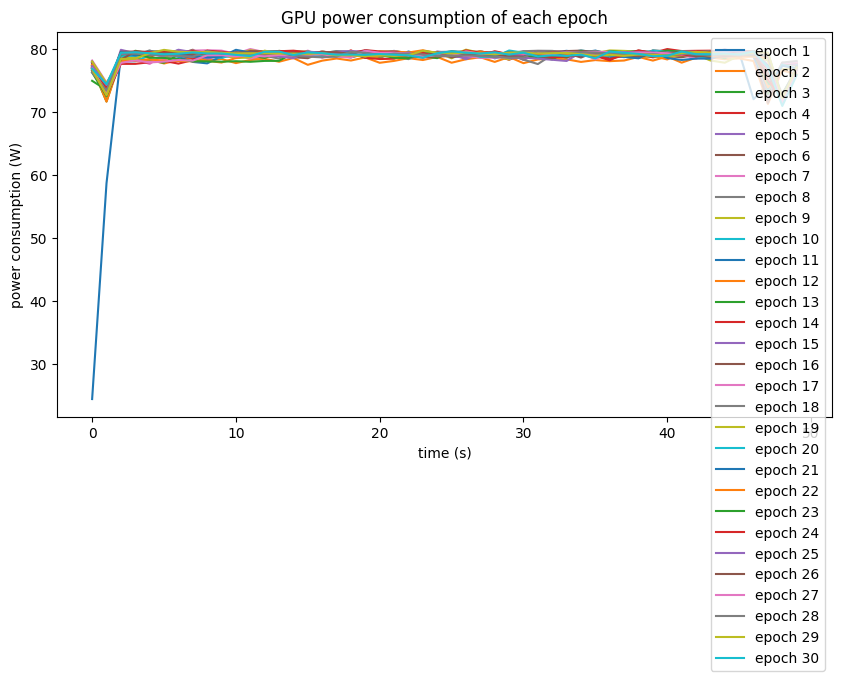

In [40]:
# plot the GPU power consumption of each epoch
import matplotlib.pyplot as plt


# plot the GPU power consumption of each epoch
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(GPU_info_epoch)):
    ax.plot(GPU_info_epoch[i], label='epoch %d' % (i+1))
ax.set_xlabel('time (s)')
ax.set_ylabel('power consumption (W)')
ax.set_title('GPU power consumption of each epoch')
ax.legend()
plt.show()

In [44]:
# calculate the average GPU power consumption of each epoch
GPU_info_epoch_avg = []
for i in range(len(GPU_info_epoch)):
    GPU_info_epoch_avg.append(np.average(GPU_info_epoch[i]))
print(GPU_info_epoch_avg)

[77.2234693877551, 77.8676, 78.601, 78.6844, 78.696, 78.67020000000001, 78.81739999999999, 78.7612, 78.8056, 78.7736, 78.736, 78.6986, 78.68220000000001, 78.62280000000001, 78.7238, 78.80239999999999, 78.637, 78.9546, 78.69239999999999, 78.7736, 78.72840000000001, 78.6054, 78.5258, 78.86359999999999, 78.84100000000001, 78.7762, 78.6376, 78.7244, 78.80900000000001, 78.73880000000001]


In [47]:
# calculate the average GPU power consumption of all epochs
GPU_info_epoch_avg_total = np.average(GPU_info_epoch_avg)
print(GPU_info_epoch_avg_total)

78.6491356462585


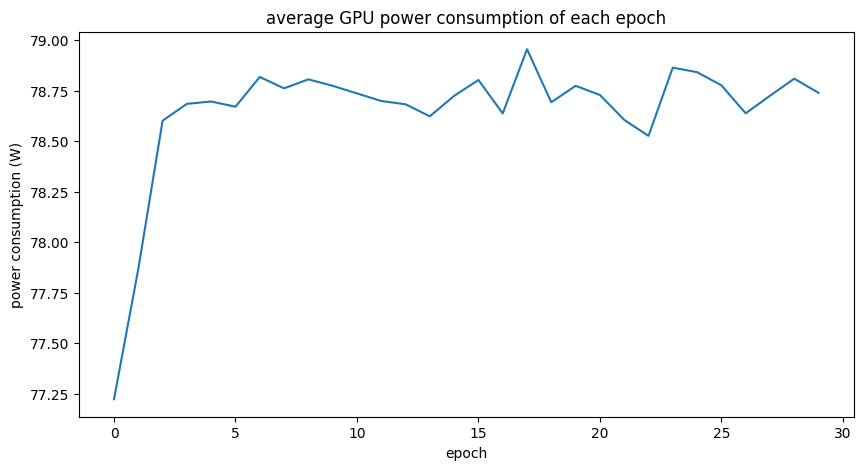

In [46]:
# plot the average GPU power consumption of each epoch
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(GPU_info_epoch_avg)
ax.set_xlabel('epoch')
ax.set_ylabel('power consumption (W)')
ax.set_title('average GPU power consumption of each epoch')
plt.show()

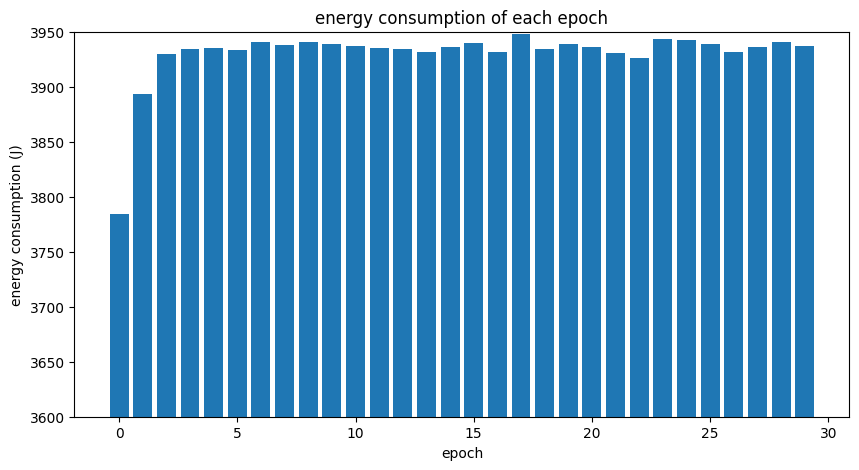

In [43]:
# plot energy_epoch_f using bar chart
plt.figure(figsize=(10,5))
plt.bar(range(len(energy_epoch_f)), energy_epoch_f)
plt.xlabel('epoch')
plt.ylabel('energy consumption (J)')
plt.ylim(3600, 3950)
plt.title('energy consumption of each epoch')
plt.show()

In [36]:
idle_gpu_consumption = gpu_idle_avg * 50*30
print(idle_gpu_consumption)

38246.99999999999


In [38]:
# calculate the total energy consumption of the GPU
energy_total_GPU = energy_total - idle_gpu_consumption
print(energy_total_GPU)
energy_total_GPUkWh = energy_total_GPU / 3600000
print(energy_total_GPUkWh, 'kWh')

79649.48000000001
0.02212485555555556 kWh
